# Exploring Exoplanet Habitability

This notebook explores habitability of exoplanets using the latest catalog from the "Planetary Habitability Laboratory" (https://phl.upr.edu/hwc/data) website. The target variable, "P_HABITABLE," categorizes planets as inhabitable (0), conservatively habitable (1), or optimistically habitable (2). We aim to identify key features influencing habitability.

We'll examine interesting features, split the data into 80% training and 20% testing for model evaluation, and experiment with unsupervised learning to see if distinct planet clusters emerge after label removal.

In [198]:
!pip install --upgrade ipykernel
import ipykernel

print(ipykernel.__version__)

6.28.0


Traceback (most recent call last):
  File "C:\Users\abudh\anaconda3\Scripts\pip-script.py", line 9, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\cli\main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\commands\__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._boots

In [199]:
import ipykernel

print(ipykernel.__version__)

6.28.0


In [200]:

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et
#!pip install --upgrade pandas dabl seaborn scikit-learn eli5



ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn mlxtend yellowbrick
!pip install eli5 dabl

# Additional scikit-learn upgrade
!pip install --upgrade scikit-learn


# Install or update other libraries
!pip install --upgrade pandas dabl seaborn scikit-learn eli5
!pip install scikit-learn-tree
!pip install eli
!pip install sklearn2gem
!pip install not-sklearn
!pip install sklearn-ensemble-cv
!pip install sklearn-preprocessing
!pip install quicksemble
!pip install impute-test
!pip install sklearn01
!pip install sklearn3
!pip install preprocessing
!pip install sklearn-linear-model-modification
!pip install naive-bayes
!pip install sklearn01
!pip install yellowbrick
!pip install sklearn3
!pip install sklearn

!pip install ml-impute
!pip install experimental
!pip install sklearn2
!pip install eli5
!pip install ecg-feature-selection
!pip install sklearn-ensemble-cv
!pip install feature-selection-ga
!pip install model-selection
!pip install sklearn-preprocessing
!pip install matplotlib dabl plotly eli5 scikit-learn
!pip install eli5
!pip install eli5==0.13.0  scikit-learn==1.4.1.post1

In [201]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [202]:

df = pd.read_csv("phl_exoplanet_catalog_2019.csv")
df.head()

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0    11 Com b       3.0  6165.86330        -476.74200         476.74200   
1    11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2    14 And b       3.0  1525.57440               NaN               NaN   
3    14 Her b       3.0  1481.07850         -47.67420          47.67420   
4  16 Cyg B b       3.0   565.73385         -25.42624          25.42624   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  2014-05-14  ...   
1       NaN                 NaN                 NaN    2009  2018-09-06  ...   
2       NaN                 NaN                 NaN    2008  2014-05-14  ...   
3       NaN                 NaN                 NaN    2002  2018-09-06  ...   
4       NaN                 NaN                 NaN    1996  2018-09-06  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0              0          Hot            0  0.083813   Coma Berenices   
1              0          Hot            0  0.082414       Ursa Minor   
2              0          Hot            0  0.081917        Andromeda   
3              0         Cold            0  0.145241         Hercules   
4              1         Warm            0  0.368627           Cygnus   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                  Com      Berenice's Hair     12.082709  6165.86330   
1                  UMi          Little Bear     12.229641  4684.78480   
2                  And            Andromeda     12.848516  1525.57440   
3                  Her             Hercules     12.865261  1481.07850   
4                  Cyg                 Swan     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 112 columns]

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


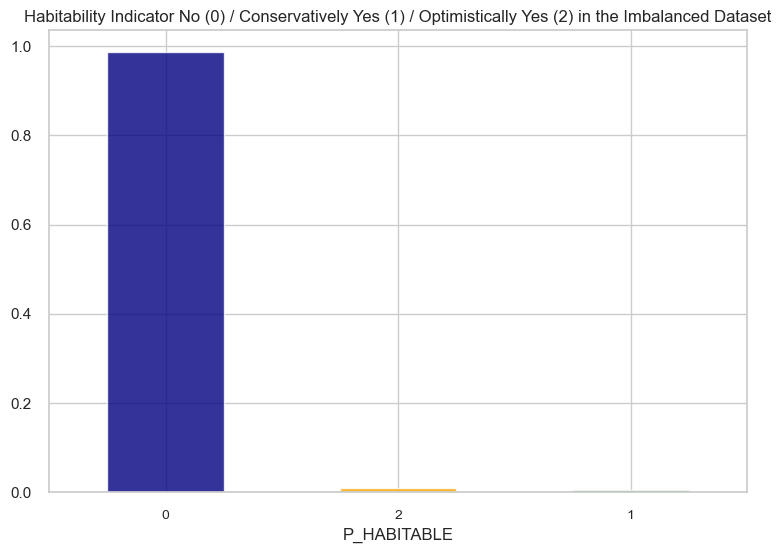

In [204]:
fig = plt.figure(figsize=(9, 6))
df['P_HABITABLE'].value_counts(normalize=True, ascending=False).plot(kind='bar', color=['navy', 'orange', 'green'], alpha=0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()


In [205]:
df['P_HABITABLE'].value_counts(normalize= True)

P_HABITABLE
0    0.986413
2    0.008399
1    0.005188
Name: proportion, dtype: float64

In [206]:
import dabl

print(dabl.__version__)

#!pip install --upgrade pip

0.2.6-dev


DABL (Data Analysis Baseline Library) is commonly used for automating data analysis tasks. It facilitates automated exploration of datasets, visualization of data distributions, handling categorical variables, building and evaluating machine learning models, and providing statistical summaries. Its interactive web-based interface makes it user-friendly for rapid prototyping and experimentation in data analysis and machine learning workflows.







Target looks like classification
Showing only top 10 of 84 continuous features
Linear Discriminant Analysis training set score: 0.865


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='P_HABITABLE'>,
 [<Figure size 2000x600 with 10 Axes>,
  array([[<Axes: title={'center': '0.833'}, xlabel='P_ESI', ylabel='P_TEMP_EQUIL'>,
          <Axes: title={'center': '0.752'}, xlabel='P_ESI', ylabel='S_TEMPERATURE'>,
          <Axes: title={'center': '0.717'}, xlabel='P_ESI', ylabel='P_TEMP_EQUIL_MIN'>,
          <Axes: title={'center': '0.711'}, xlabel='P_ESI', ylabel='P_OMEGA_ERROR_MAX'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 400x400 with 1 Axes>],
 array([[<Axes: title={'center': 'P_TYPE_TEMP'}>,
         <Axes: title={'center': 'P_TYPE'}>,
         <Axes: title={'center': 'S_TYPE_TEMP'}>,
         <Axes: title={'center': 'P_DETECTION'}>]], dtype=object)]

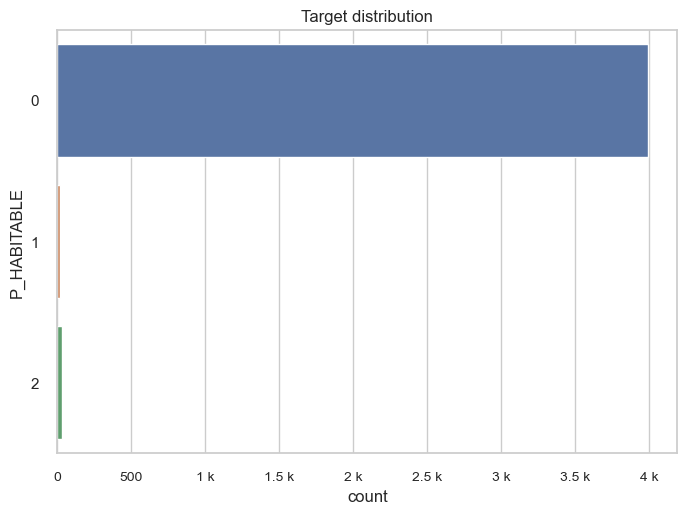

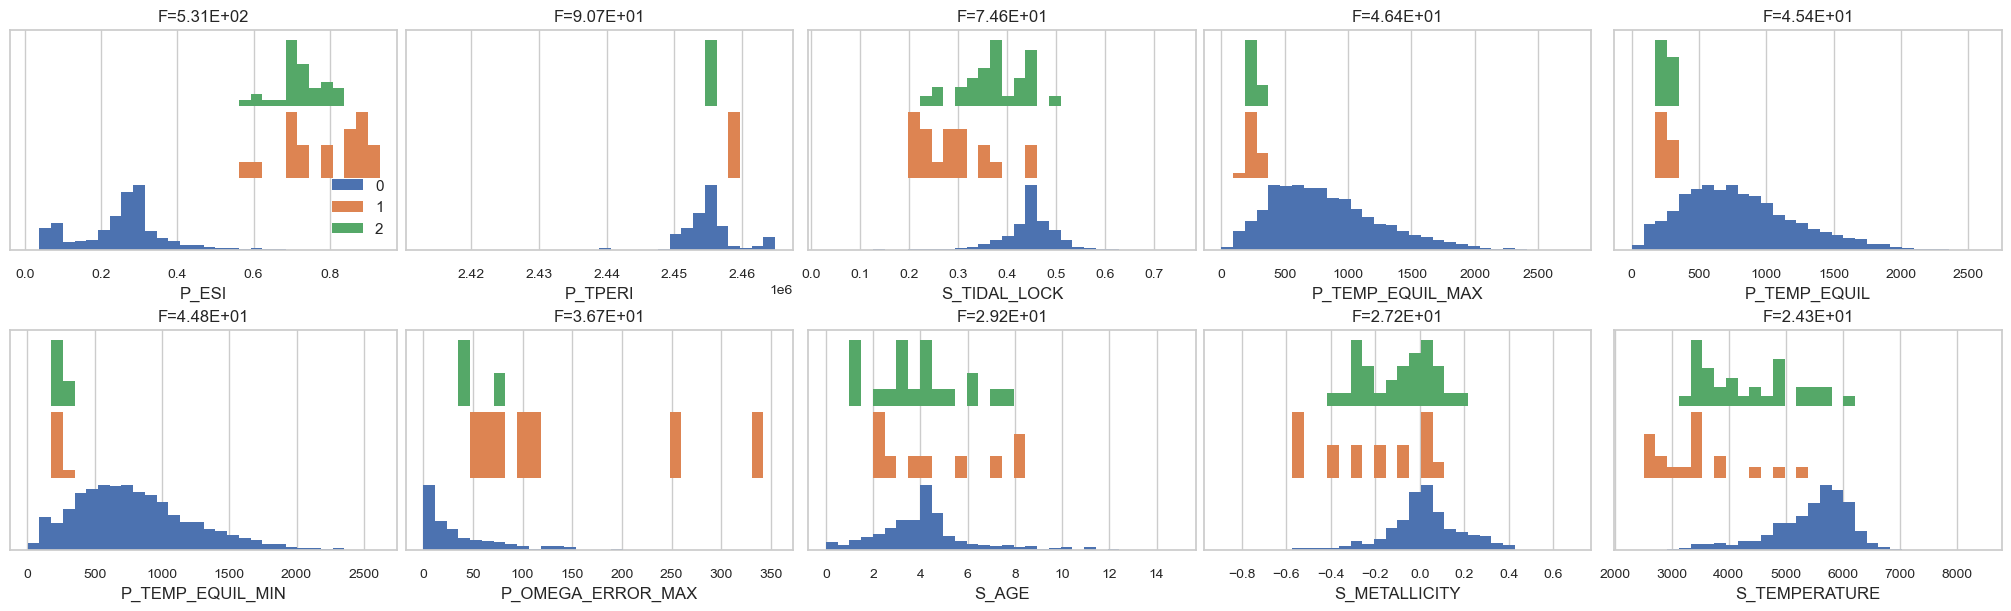

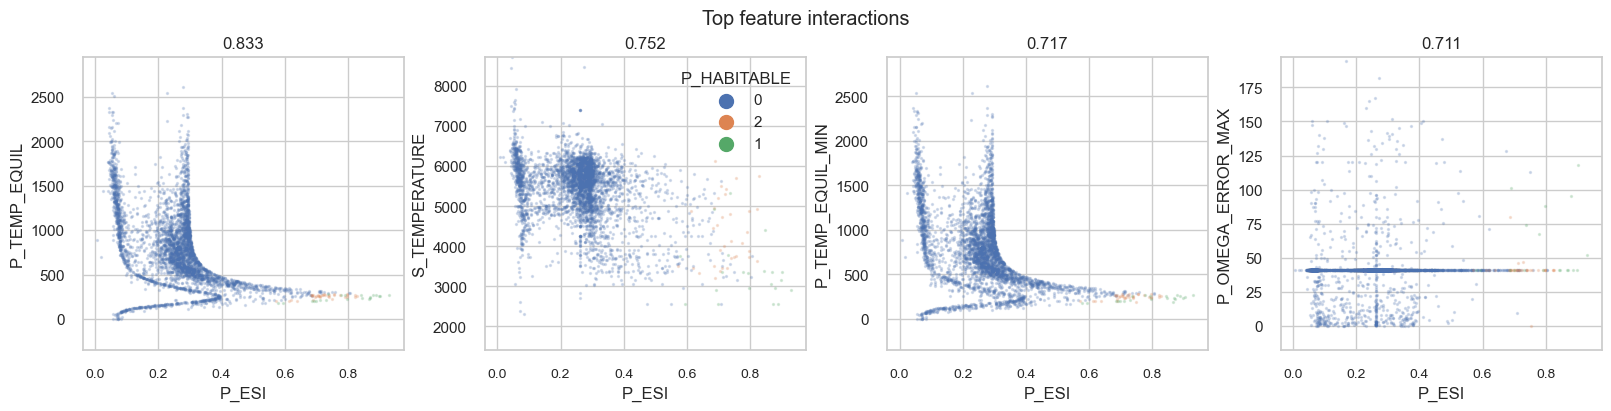

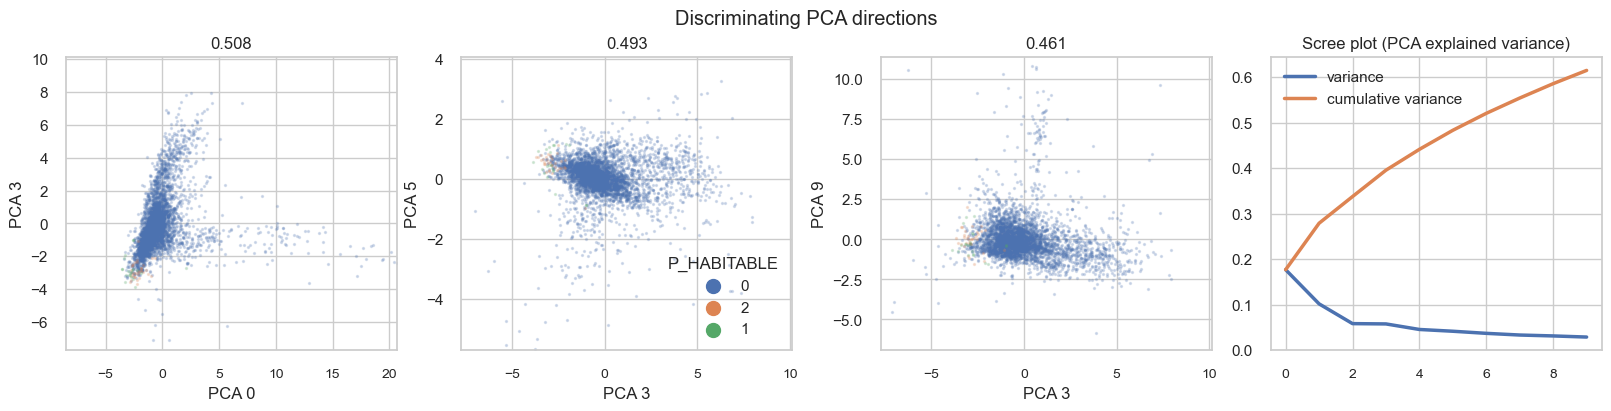

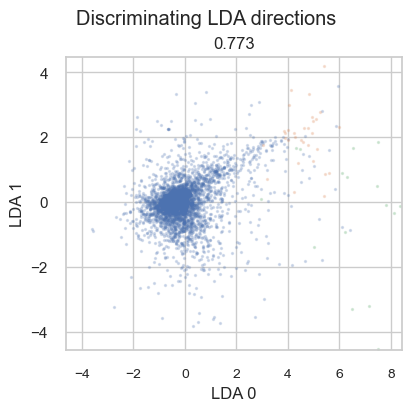

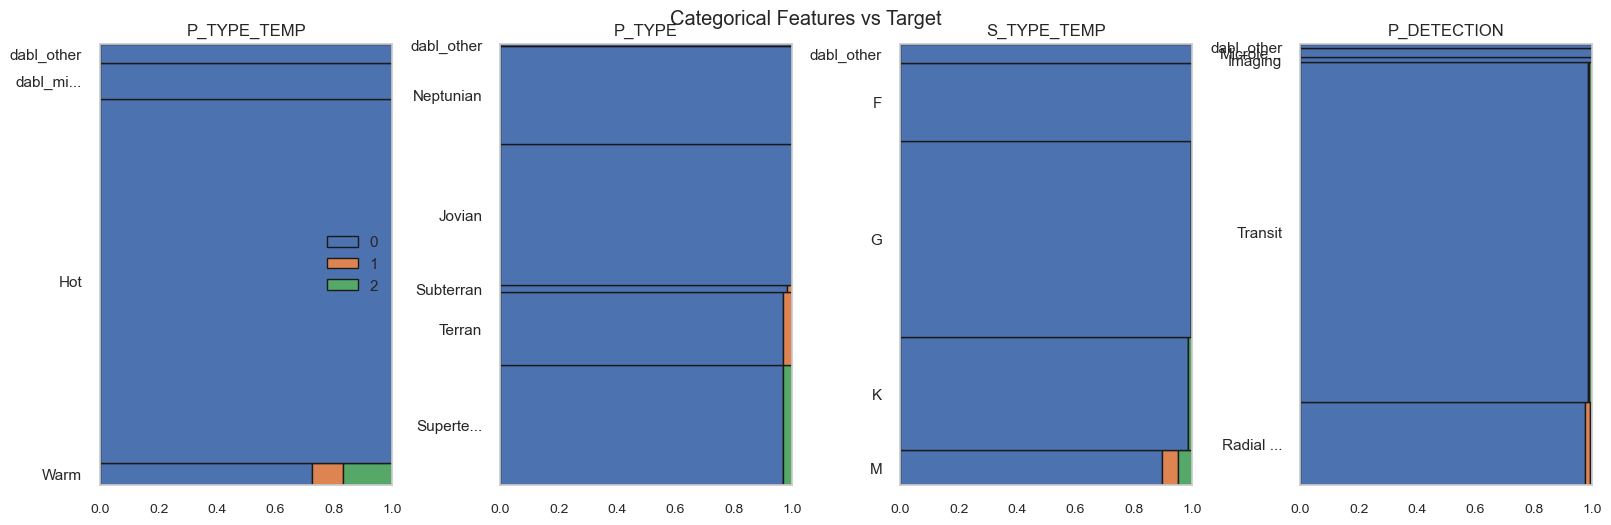

In [207]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dabl.plot(df, target_col = 'P_HABITABLE')

#  Resolving Class Imbalance with Simple Oversampling Strategy


The dataset displays a notable imbalance, with 98.64% of planets classified as inhabitable, while conservatively habitable and optimistically habitable planets make up only 0.84% and 0.52%, respectively. To improve the performance of machine learning models, it is essential to rectify this imbalance by balancing the dataset. This is achieved through the use of a straightforward oversampling technique, ensuring that each class is proportionally represented for more effective model training.






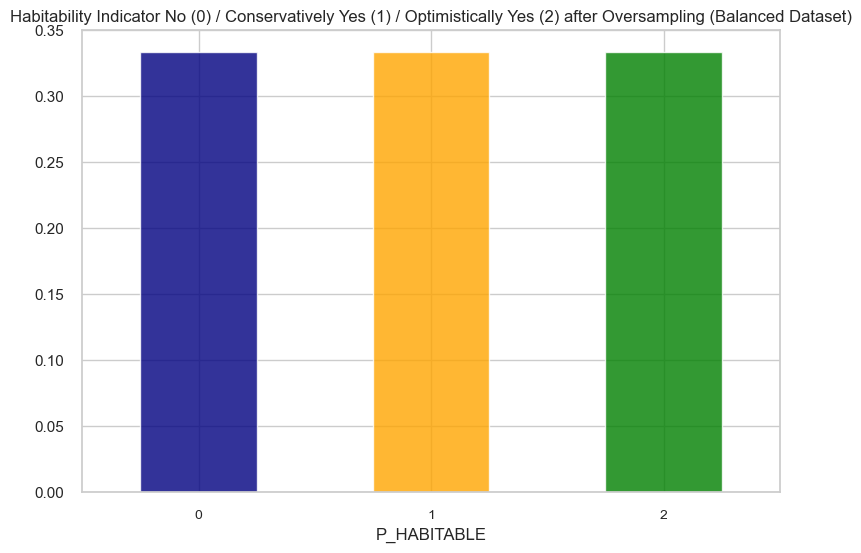

In [208]:
from sklearn.utils import resample

no = df[df['P_HABITABLE'] == 0]
yes_cons = df[df['P_HABITABLE'] == 1]
yes_opti = df[df['P_HABITABLE'] == 2]

# Oversample the conservatively habitable class
yes_cons_oversampled = resample (yes_cons, replace = True, n_samples = len(no), random_state=12345)
# Concatenate the oversampled conservatively habitable class with the majority class
oversampled = pd.concat([no,yes_cons_oversampled])

yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

# Visualize the distribution of habitability classes after oversampling
fig = plt.figure(figsize = (9,6))
oversampled['P_HABITABLE'].value_counts(normalize=True, ascending =False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()


In [209]:
oversampled['P_HABITABLE'].value_counts(normalize=True)
#Now we can observe that each class is having equal proportion of representation in the oversampled data set.



P_HABITABLE
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

# Data Analysis through Visualisation
 ## Planetry Detection Methods:


In [210]:
print(df['P_DETECTION'].unique())

['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Orbital Brightness Modulation'
 'Pulsation Timing Variations' 'Microlensing' 'Transit Timing Variations'
 'Pulsar Timing']


The analysis aims to identify planetary detection methods extensively used in discovering exoplanets, defined as methods where more than 5 planets have been discovered. 

In [211]:
detection_method_counts = df.groupby(['P_DETECTION', 'P_YEAR']).size().reset_index(name='Number_of_Exoplanets')
extensive_methods = detection_method_counts[detection_method_counts['Number_of_Exoplanets'] > 5]
print(extensive_methods)


                  P_DETECTION  P_YEAR  Number_of_Exoplanets
13                    Imaging    2008                     8
15                    Imaging    2010                     6
18                    Imaging    2013                     6
32               Microlensing    2012                     7
36               Microlensing    2016                    10
37               Microlensing    2017                     9
38               Microlensing    2018                    20
52            Radial Velocity    1996                     6
54            Radial Velocity    1998                     6
55            Radial Velocity    1999                    13
56            Radial Velocity    2000                    16
57            Radial Velocity    2001                    12
58            Radial Velocity    2002                    28
59            Radial Velocity    2003                    21
60            Radial Velocity    2004                    18
61            Radial Velocity    2005   

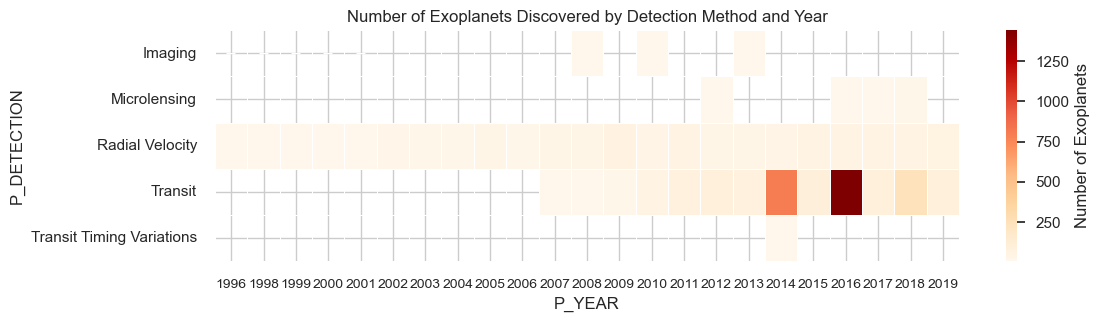

In [212]:
#Plot the heat map
heatmap_data = extensive_methods.pivot(index = 'P_DETECTION', columns = 'P_YEAR',values = 'Number_of_Exoplanets')

plt.figure(figsize=(12,3))
sns.heatmap(heatmap_data, cmap='OrRd', annot = True, fmt ='g', linewidth =0.5,cbar_kws={'label': 'Number of Exoplanets'})
plt.title('Number of Exoplanets Discovered by Detection Method and Year')
plt.show()

We can observe Transit and Radial Velocity planetary detection techniques have been used most extensively for discovering exoplanets. Now, we will observe, how many planets detected by these two methods have posibility of habitability.



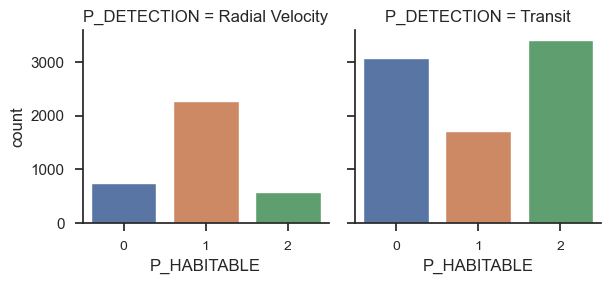

In [213]:
# Filter the DataFrame for 'Radial Velocity' and 'Transit' methods
selected_methods = ['Radial Velocity', 'Transit']
filtered_data = oversampled[oversampled['P_DETECTION'].isin(selected_methods)]

# Create catplot with col_wrap
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='P_HABITABLE', col='P_DETECTION', col_wrap=3, data=filtered_data, kind='count', height=3.0, aspect=1.0)

We observe that Radial Velocity technique has been used more to detect conservatively habitable exoplanets. Transit technique has been used well to detect both optimistically habitable exoplanets and non-habitable exoplanets.

# Stars and Planets Discovery over the Years: 
The analysis seeks to explore the evolution of exoplanet discoveries over the years, specifically examining the identification of planets and their associated stars. The focus is on plotting stars with more than 10 attached planets, shedding light on the distribution of exoplanet discoveries among various stars and their respective detection years.






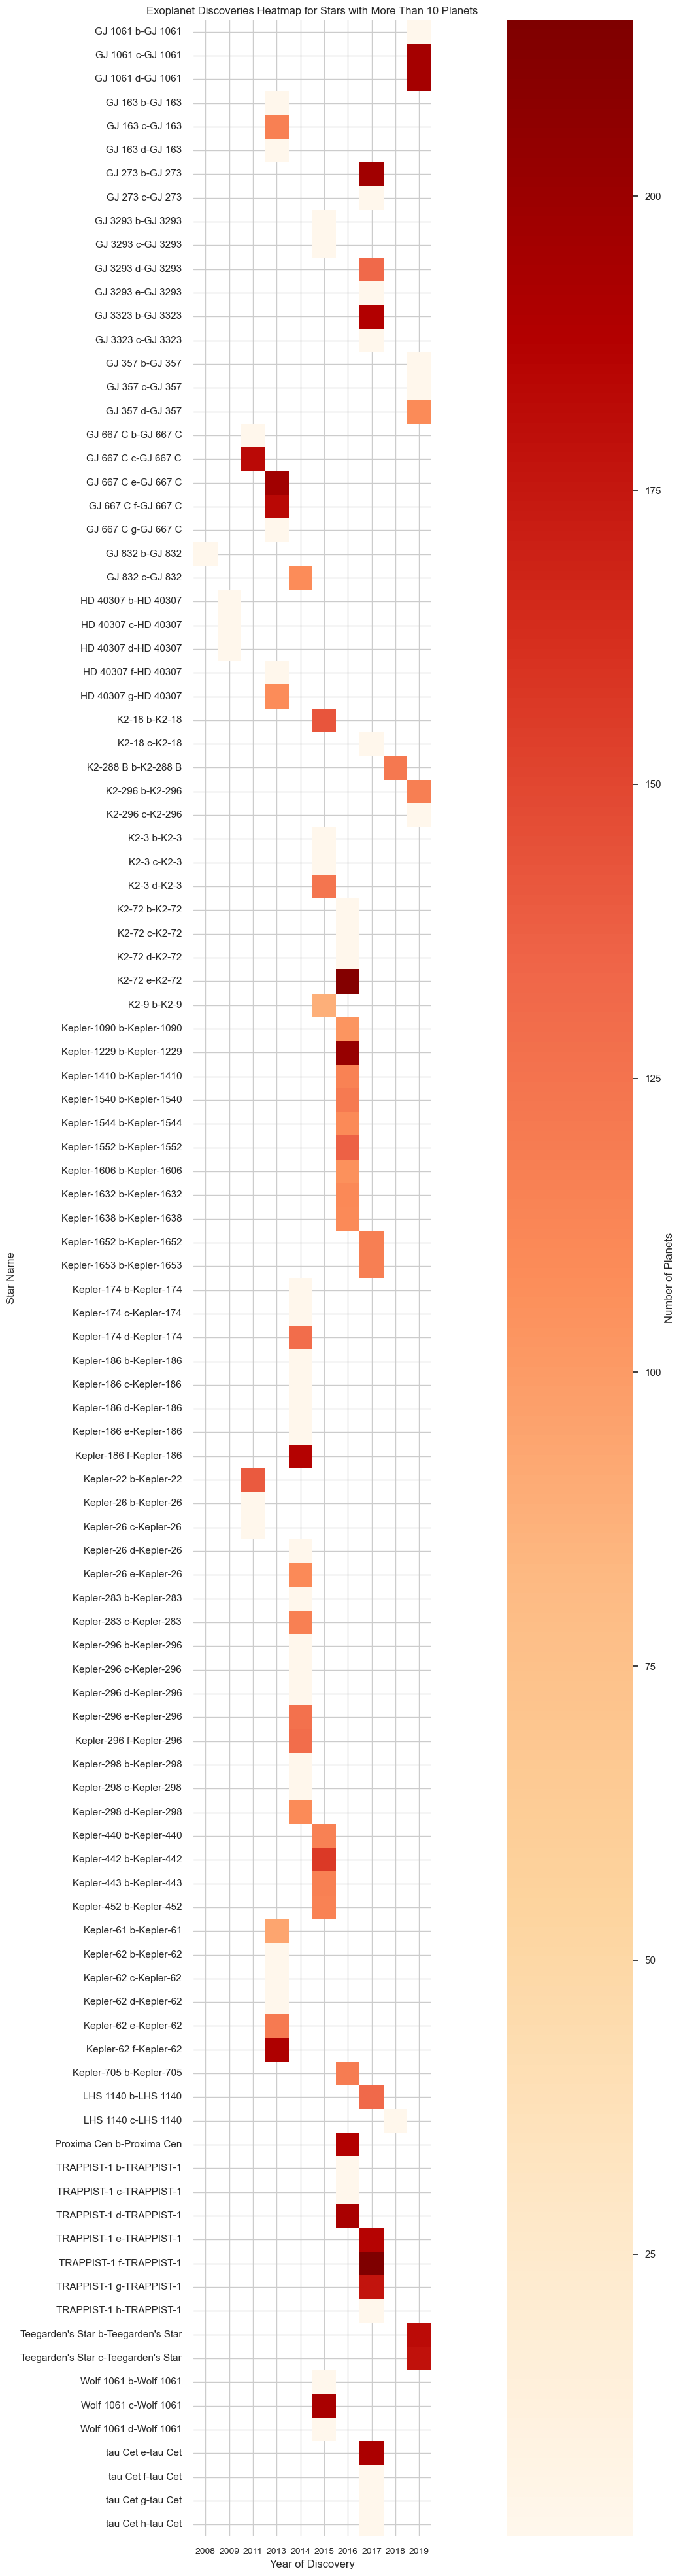

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter stars with more than 10 attached planets
stars_with_more_than_10_planets = oversampled['S_NAME'].value_counts() > 10
selected_stars = stars_with_more_than_10_planets[stars_with_more_than_10_planets].index

# Filter the DataFrame for stars with more than 10 planets
filtered_data = oversampled[oversampled['S_NAME'].isin(selected_stars)]

# Group the filtered data by 'P_NAME', 'S_NAME', and 'P_YEAR', and create a matrix-like representation with counts
grouped_data = filtered_data.groupby(['P_NAME', 'S_NAME', 'P_YEAR']).size().unstack()

# Create a heatmap
plt.figure(figsize=(30, 50))
sns.heatmap(grouped_data, cmap='OrRd',square = True,  cbar_kws={'label': 'Number of Planets'})
plt.title('Exoplanet Discoveries Heatmap for Stars with More Than 10 Planets')
plt.xlabel('Year of Discovery')
plt.ylabel('Star Name')
plt.show()


We see, for the star GJ667, planets were discovered in older years (2008-2009). For Kepler series stars, the planets were discovered in between years 2011 and 2014. For Trappist and Teegarden series stars, the planets have been discovered in very recent years (2017-2019).

For better exploration, we will consider P_UPDATED date to observe progress of star discovery and planet discovery over the years. We will see a steep increase in trend.

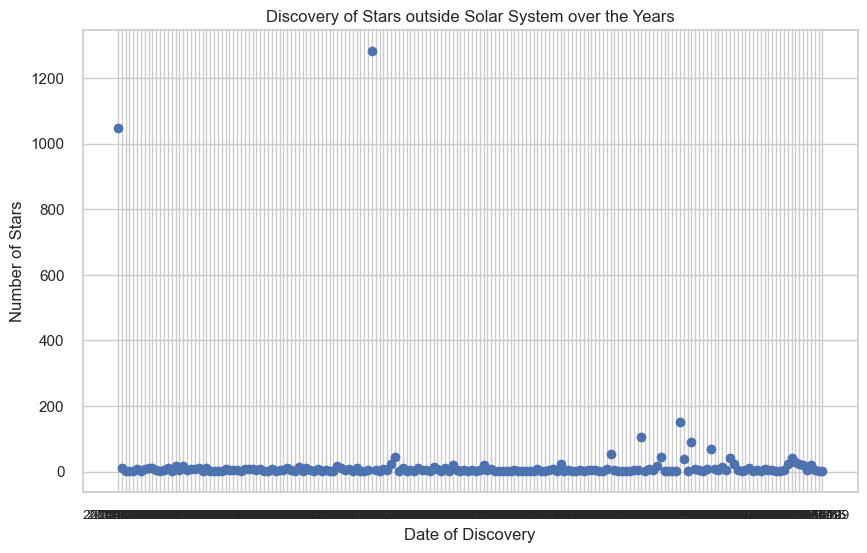

In [215]:
# Convert 'P_UPDATED' to datetime with the correct format
#df['P_UPDATED'] = pd.to_datetime(df['P_UPDATED'])

# Group by 'P_UPDATED' and count the number of stars
stars_by_date = df.groupby('P_UPDATED')['S_NAME'].count().reset_index(name='Number_of_Stars')
planets_by_date = df.groupby('P_UPDATED')['P_NAME'].count().reset_index(name='Number_of_Planets')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(stars_by_date['P_UPDATED'], stars_by_date['Number_of_Stars'], marker='o')
plt.title('Discovery of Stars outside Solar System over the Years')
plt.xlabel('Date of Discovery')
plt.ylabel('Number of Stars')
plt.show()


Text(0, 0.5, 'Number of Planets')

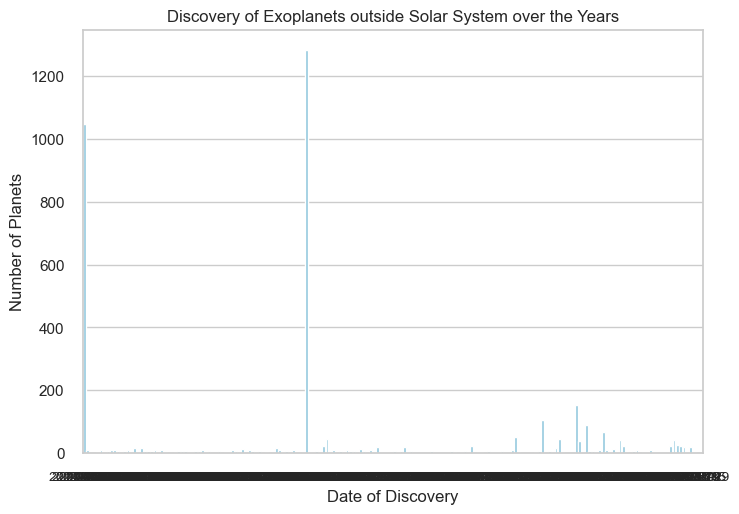

In [216]:
# Plot for Number of Planets
plt.subplot(1, 1, 1)
sns.barplot(x='P_UPDATED', y='Number_of_Planets', data=planets_by_date, color='skyblue')
plt.title('Discovery of Exoplanets outside Solar System over the Years')
plt.xlabel('Date of Discovery')
plt.ylabel('Number of Planets')

This analysis delves into the factors influencing exoplanet habitability, exploring planet type, star spectral type, and planet thermal conditions. Understanding these classifications provides insights into the potential habitability of distant celestial bodies.

## Planet Type:
Exoplanets are classified into Jovian, Superterran, Neptunian, Subterran, Terran, and Miniterran types. Terrans, like Earth, support significant atmospheres with liquid water, while Superterrans can maintain dense atmospheres in the habitable zone. This classification sheds light on the diverse atmospheric conditions of exoplanets.

## Star Spectral Type (A,B,F,G,K,M,O):
Stars hosting exoplanets are classified from A to O based on hydrogen absorption lines. This categorization, developed by Williamina Fleming's group, helps understand the radiation and energy received by exoplanets. The star's spectral type directly influences potential habitability conditions.

## Planet Thermal Type:
Exoplanets are thermal classified as Cold, Hot, or Warm, reflecting their thermal conditions. This analysis aims to uncover the relationships between thermal types and habitability, offering insights into the thermal dynamics of exoplanets.

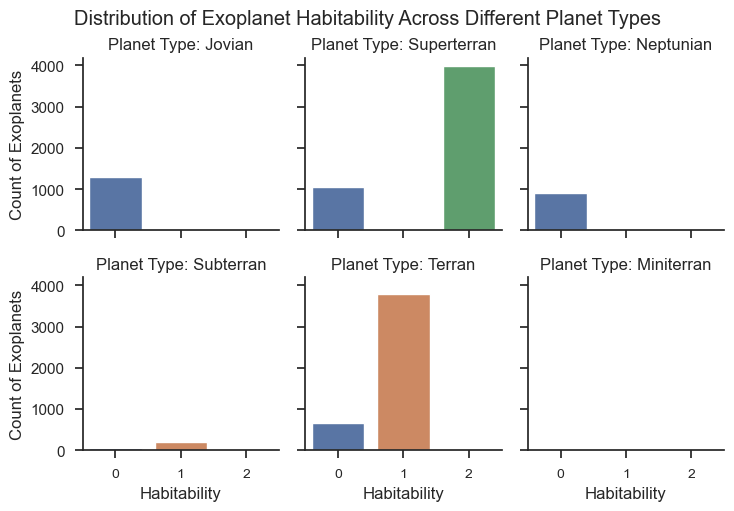

In [217]:
with sns.axes_style(style='ticks'):
    # Create a catplot to visualize habitability across planet types
    habitability_by_planet_type = sns.catplot(x="P_HABITABLE", col="P_TYPE", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)
    
    # Set axis labels and titles
    habitability_by_planet_type.set_axis_labels("Habitability", "Count of Exoplanets")
    habitability_by_planet_type.set_titles("Planet Type: {col_name}")
    
    # Set overall plot title
    habitability_by_planet_type.fig.suptitle("Distribution of Exoplanet Habitability Across Different Planet Types", y=1.02)

# Show the plot
plt.show()

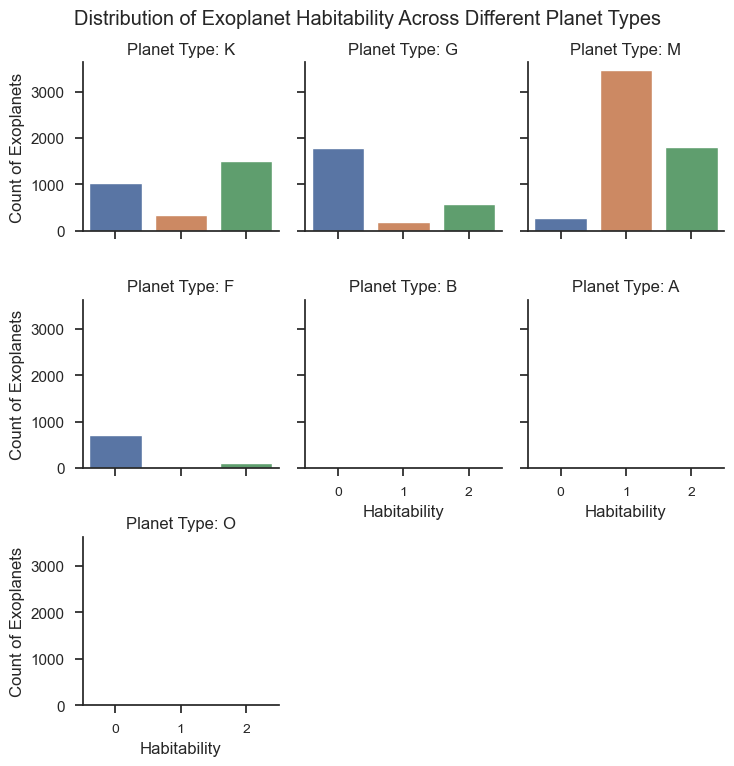

In [218]:
with sns.axes_style(style='ticks'):
    # Create a catplot to visualize habitability across planet types
    habitability_by_planet_type = sns.catplot(x="P_HABITABLE", col="S_TYPE_TEMP", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)
    
    # Set axis labels and titles
    habitability_by_planet_type.set_axis_labels("Habitability", "Count of Exoplanets")
    habitability_by_planet_type.set_titles("Planet Type: {col_name}")
    
    # Set overall plot title
    habitability_by_planet_type.fig.suptitle("Distribution of Exoplanet Habitability Across Different Planet Types", y=1.02)

# Show the plot
plt.show()

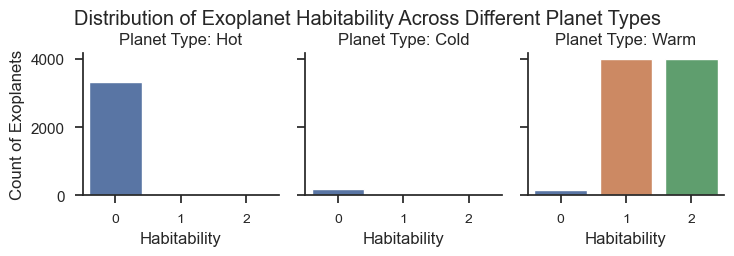

In [219]:
with sns.axes_style(style='ticks'):
    # Create a catplot to visualize habitability across planet types
    habitability_by_planet_type = sns.catplot(x="P_HABITABLE", col="P_TYPE_TEMP", col_wrap=3, data=oversampled, kind="count", height=2.5, aspect=1.0)
    
    # Set axis labels and titles
    habitability_by_planet_type.set_axis_labels("Habitability", "Count of Exoplanets")
    habitability_by_planet_type.set_titles("Planet Type: {col_name}")
    
    # Set overall plot title
    habitability_by_planet_type.fig.suptitle("Distribution of Exoplanet Habitability Across Different Planet Types", y=1.02)

# Show the plot
plt.show()

We observe that the superterran planet type has a considerable number of optimistically habitable planets, while the terran planet type shows a higher count of conservatively habitable planets. The M-type star spectral category displays a significant number of both conservatively and optimistically habitable planets. Additionally, the warm planet thermal type is associated with a notably high count of both conservatively and optimistically habitable planets.






## Habitable Planets Discovery Years :


We will now examine the trend of habitable planet discoveries over the years, assessing the cumulative number of habitable planets identified during this period.

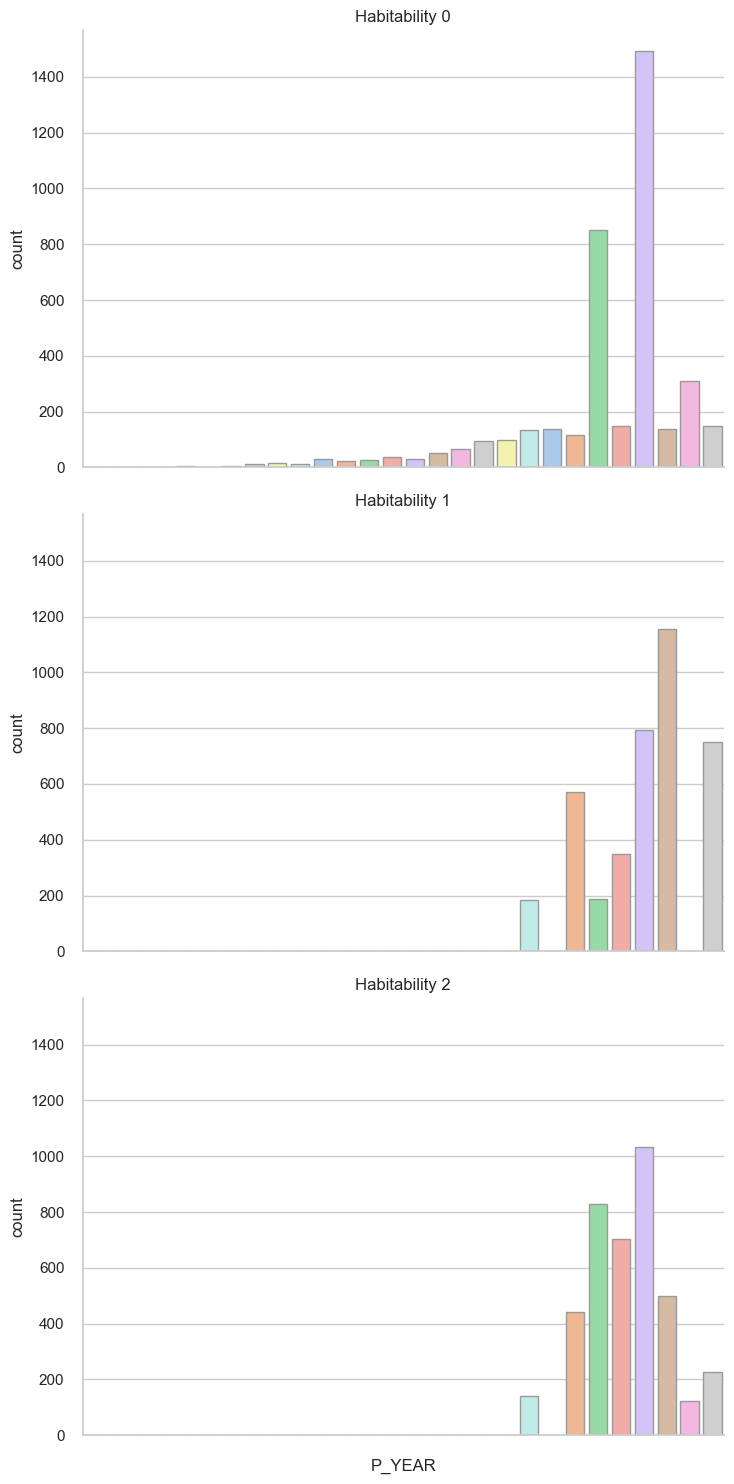

In [220]:
sns.set(style="whitegrid")
sns.set_context("notebook", rc={"lines.linewidth": 2.5})

# Plot each row separately with row specified
g = sns.catplot(x="P_YEAR", col="P_HABITABLE", kind="count", palette="pastel", edgecolor=".6", data=oversampled, aspect=1.5, col_wrap=1)

# Set titles for each subplot
g.set_titles("Habitability {col_name}")

# Rotate x-axis labels vertically
g.set_xticklabels(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

Notably, maximum number of conservatively habitable exoplanets have been discovered in 2013, 2017, 2019 respectively. And maximum number of optimistically habitable exoplanets have been discovered in 2014 and 2016 respectively.



## Earth Similarity index of a Planet and Influence on Habitability:
In this analysis, we aim to explore the relationship between the Earth Similarity Index (P_ESI) of different planet types and their thermal characteristics, investigating how P_ESI values may influence the habitability of planets. The P_ESI is a multiparameter measure indicating Earth-likeness, ranging from zero (no similarity) to one (identical to Earth). We will assess how various thermal types of planets correlate with their P_ESI, shedding light on whether a higher P_ESI is indicative of a greater likelihood of habitability. The analysis will provide insights into the Earth Similarity Index's role in assessing the potential habitability of different planet types.

In [221]:
oversampled= oversampled.dropna(subset=['P_TYPE_TEMP'])
oversampled['P_TYPE_TEMP'].unique()


array(['Hot', 'Cold', 'Warm'], dtype=object)

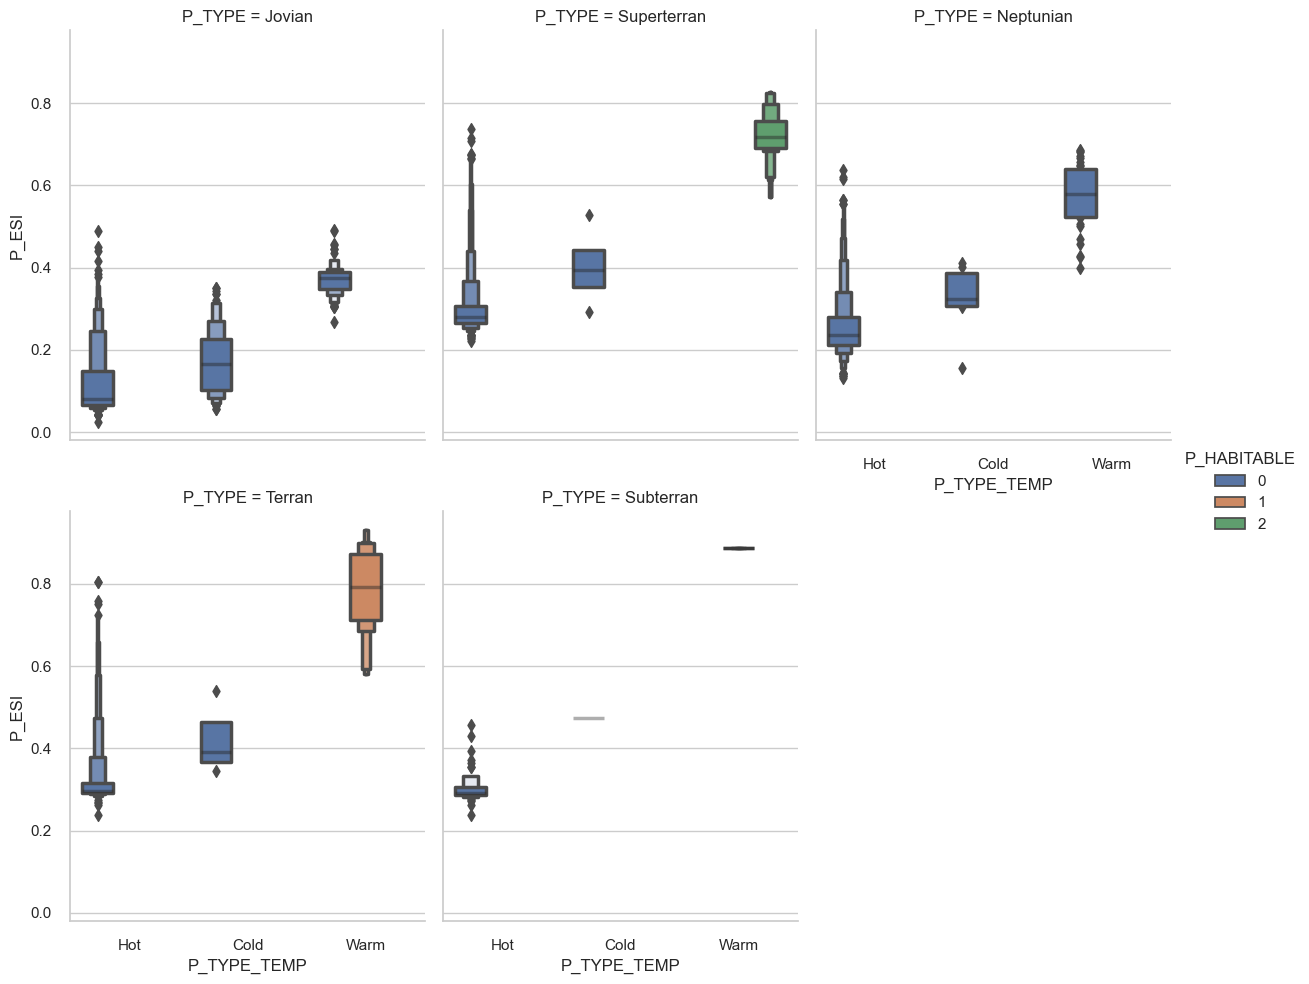

In [222]:
sns.catplot(x="P_TYPE_TEMP", y="P_ESI", hue="P_HABITABLE",
            col="P_TYPE", col_wrap=3, aspect=0.8,
            kind="boxen", data=oversampled)

High Earth Similarity Index (P_ESI) correlates with increased habitability. Warm thermal types in superterran planets show more optimistically habitable ones, while terran planets with warm thermal types tend to have more conservatively habitable ones.






## Stellar Constellations having Potentially Habitable Planets :
We will investigate the star constellations associated with habitable exoplanets.






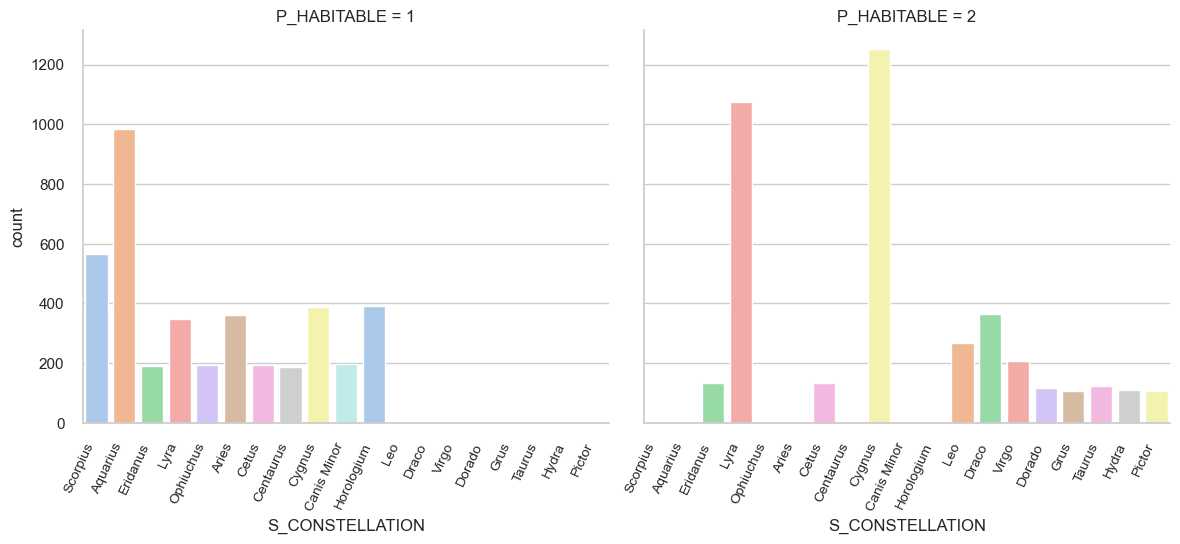

In [223]:
label_size = 10
plt.rcParams['xtick.labelsize'] = label_size
chart = sns.catplot(
    data = oversampled[oversampled['P_HABITABLE'].isin([1,2])],
    x='S_CONSTELLATION',
    kind='count',
    palette='pastel',
    col='P_HABITABLE',
    aspect=1.2)
chart.set_xticklabels(rotation =65, horizontalalignment =  'right')

Aquarius constellation hosts the highest number of conservatively habitable exoplanets, while Cygnus and Lyra constellations have the most optimistically habitable exoplanets.







## Discovering Planets with High ESI: Examining the Time Frame
In this analysis, we aim to determine the specific time frame during which planets with a high Earth Similarity Index (ESI) were discovered.

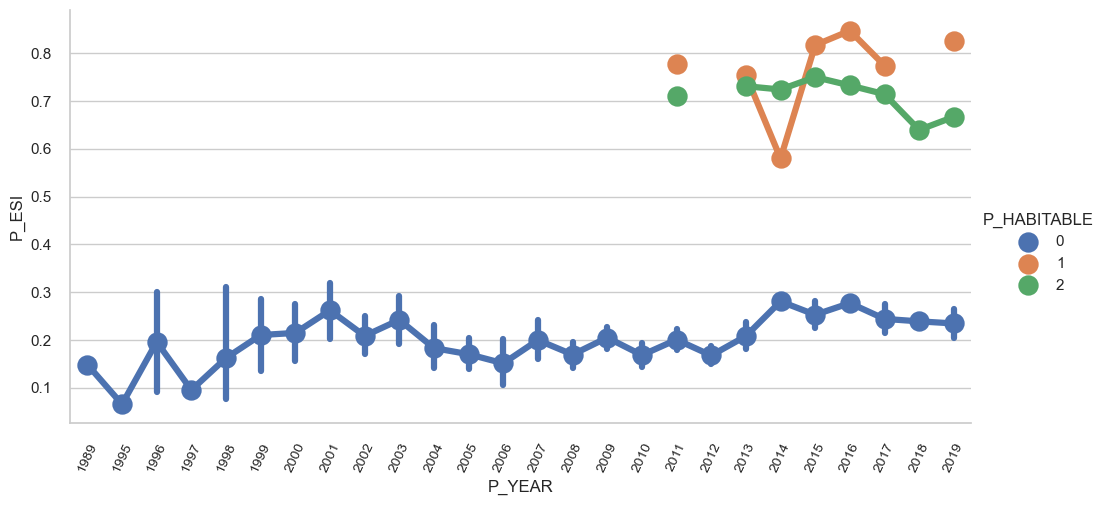

In [224]:
earth_similarity_plot =  sns.catplot(x="P_YEAR", y="P_ESI", 
                                     hue="P_HABITABLE", kind="point", data=oversampled, aspect=2.0)
earth_similarity_plot.set_xticklabels(rotation=65)


Prior to 2011, discovered exoplanets had Earth Similarity Index (ESI) values predominantly below 0.3, indicating non-habitability. However, from 2011 to 2019, a shift occurred with the discovery of habitable planets featuring higher ESI values, ranging from 0.6 to 0.9.





## Influence of Planet Mass / Planet Radius / Planet Eccentricity on Habitability:

Examining the impact of planet mass, planet radius, and planet eccentricity on habitability, we aim to discern patterns in how these factors contribute to the suitability of exoplanets for life. Eccentricity, a measure of orbit deviation from a perfect circle, is considered to understand the shape of planetary orbits.





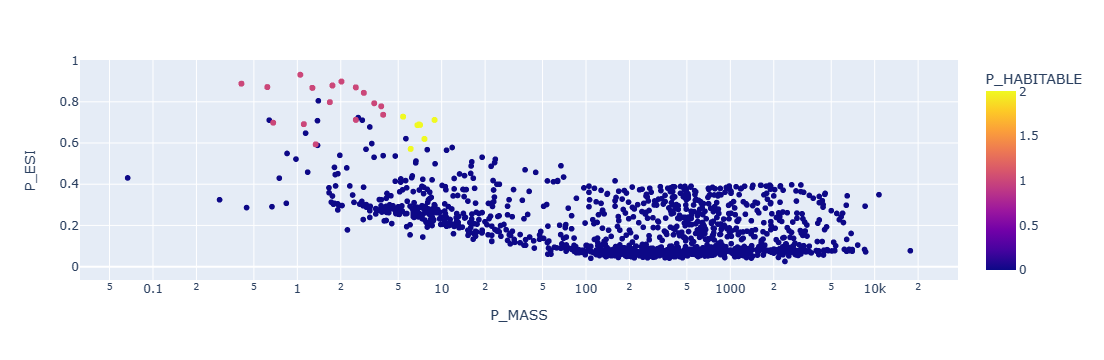

In [225]:
import plotly.express as px
fig = px.scatter(oversampled, x=oversampled['P_MASS'], y=oversampled['P_ESI'], color=oversampled['P_HABITABLE'],
                 hover_name=oversampled['P_NAME'], log_x=True, size_max=30)
fig.show()

Exoplanets with a planet mass in the range of 0.4 to 3.93 units are identified as conservatively habitable, while those with a mass in the range of 5.4 to 8.92 units are classified as optimistically habitable. Notably, conservatively habitable exoplanets exhibit slightly higher Earth Similarity Index (ESI) values compared to optimistically habitable ones.

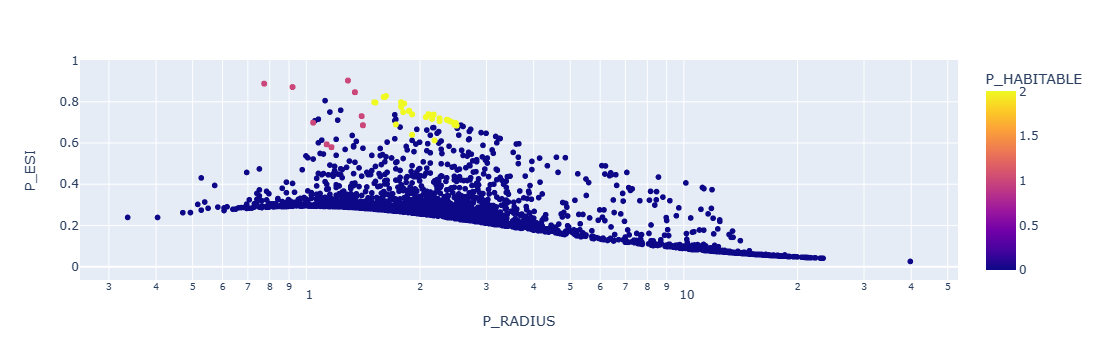

In [226]:
fig = px.scatter(oversampled, x=oversampled['P_RADIUS'], y=oversampled['P_ESI'], color=oversampled['P_HABITABLE'],
                 hover_name=oversampled['P_NAME'], log_x=True, size_max=30)
fig.show()

Exoplanets with a planet radius in the range of 0.77 to 1.41 units are categorized as conservatively habitable, while those with a radius in the range of 1.52 to 2.46 units are classified as optimistically habitable. Notably, in most cases, conservatively habitable exoplanets exhibit slightly higher Earth Similarity Index (ESI) values compared to optimistically habitable ones.

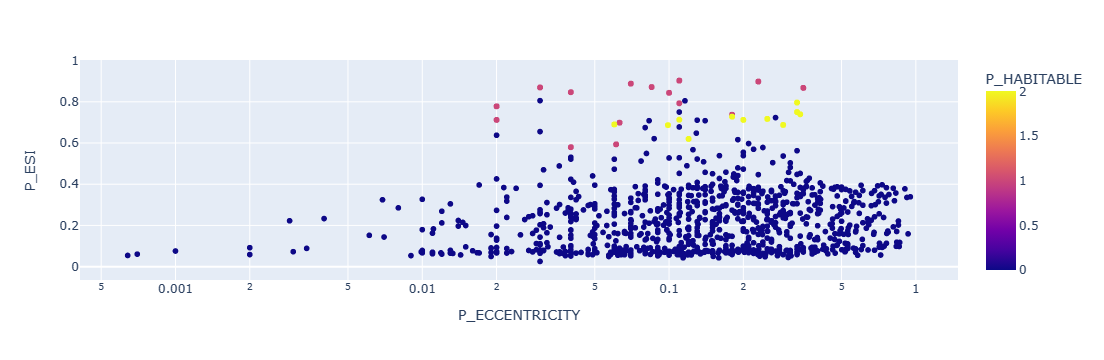

In [227]:
fig = px.scatter(oversampled, x=oversampled['P_ECCENTRICITY'], y=oversampled['P_ESI'], color=oversampled['P_HABITABLE'],
                 hover_name=oversampled['P_NAME'], log_x=True, size_max=30)
fig.show()

Planet eccentricity in the range 0.02 to 0.35 units indicate a possibility of habitability.



## Influence of Planetary Flux on Habitability :
In our exploration of the influence of planetary flux on habitability, we filtered the data to include only exoplanets with an Earth Similarity Index (ESI) greater than 0.65. The analysis focuses on understanding how the planet's stellar flux contributes to habitability. 

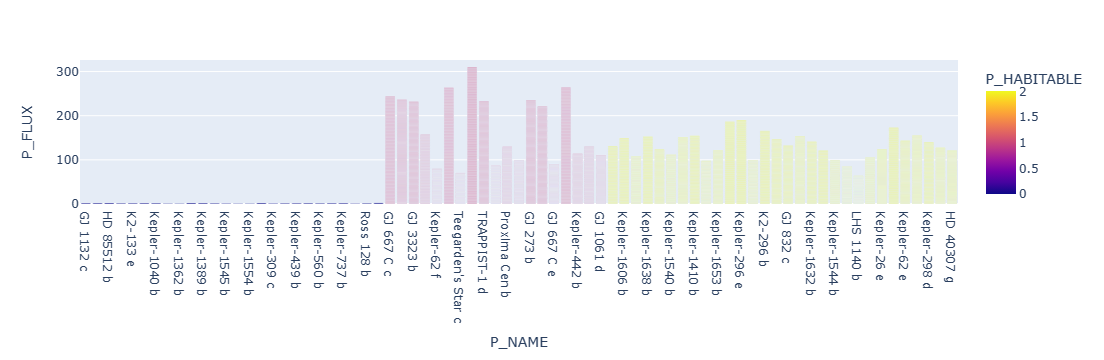

In [228]:
df2 = oversampled[oversampled['P_ESI'] > 0.65]
fig = px.bar(df2, x="P_NAME", y="P_FLUX", color="P_HABITABLE") 
fig.show()

**Conservatively Habitable Planets**: Exhibit very high flux, ranging from 150 to 300+ units on the Y-axis.

**Optimistically Habitable Planets**: Show moderately high flux, hovering around 150 units on the Y-axis.

**Non-Habitable Planets**: Feature very low flux, measuring less than 5 units.

This suggests a correlation between planetary flux levels and habitability, with conservatively habitable planets having significantly higher flux compared to both optimistically habitable and non-habitable planets.






## Influence of Age of Planet on Habitability:
We will examine whether the age of a planet (P_PERIOD) has a significant influence on its habitability. The dataset has been filtered to include only planets with an Earth Similarity Index (ESI) greater than 0.65.






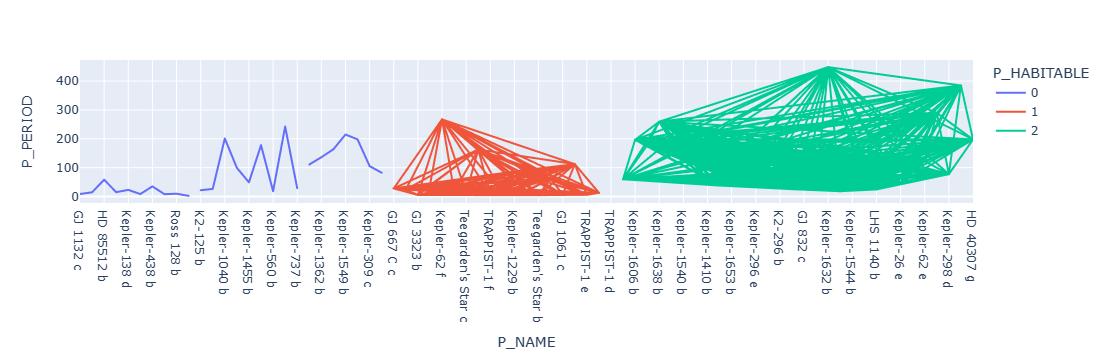

In [229]:
df3 = oversampled[oversampled['P_ESI'] > 0.65]
fig = px.line(df3, x="P_NAME", y="P_PERIOD", color="P_HABITABLE", line_group="P_TYPE")
fig.show()

In the dataset filtered for an Earth Similarity Index (ESI) greater than 0.65, the conservatively habitable cluster displays planetary periods ranging from 9 days to 267 days. Notable stars associated with this cluster include GJ 667, Kepler 62, Teegarden's Star, Trappist 1, Kepler 1229, and GJ 1061.

On the other hand, the optimistically habitable cluster exhibits planetary periods spanning from 18 days to 448 days. Stars linked to this cluster include Kepler 1606, Kepler 1638, Kepler 1540, Kepler 1410, Kepler 1653, Kepler 296, K2-296, GJ 832, Kepler 1632, Kepler 1544, LHS 1140, Kepler 26, Kepler 62, Kepler 298, and HD 40307.

## Preprocessing of Data :
Missing Data Pattern and Imputation :


<Axes: >

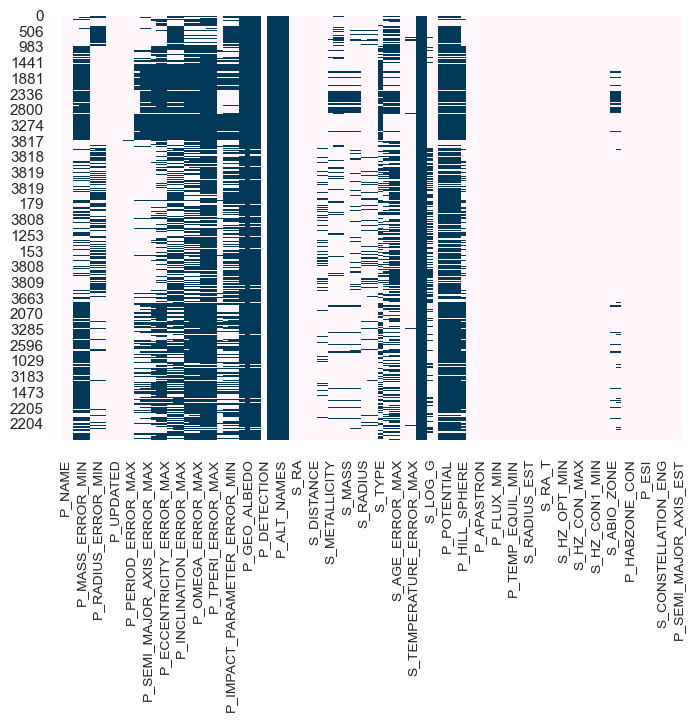

In [230]:
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [231]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

Total   Percent
P_DETECTION_RADIUS            11652  1.000000
S_DISC                        11652  1.000000
S_MAGNETIC_FIELD              11652  1.000000
P_GEO_ALBEDO                  11652  1.000000
P_ATMOSPHERE                  11652  1.000000
P_DETECTION_MASS              11652  1.000000
P_ALT_NAMES                   11652  1.000000
P_GEO_ALBEDO_ERROR_MAX        11142  0.956231
P_TEMP_MEASURED               11142  0.956231
P_GEO_ALBEDO_ERROR_MIN        11142  0.956231
P_TPERI_ERROR_MIN             10247  0.879420
P_TPERI_ERROR_MAX             10247  0.879420
P_TPERI                       10243  0.879077
P_DENSITY                      9976  0.856162
P_ESCAPE                       9976  0.856162
P_GRAVITY                      9976  0.856162
P_POTENTIAL                    9976  0.856162
P_OMEGA_ERROR_MAX              8846  0.759183
P_OMEGA_ERROR_MIN              8846  0.759183
P_OMEGA                        8508  0.730175
P_INCLINATION_ERROR_MIN        8071  0.692671
P_INCLINATION_ERROR_MAX        8071  0.692671
P_INCLINATION                  7840  0.672846
P_ECCENTRICITY_ERROR_MAX       7199  0.617834
P_ECCENTRICITY_ERROR_MIN       7199  0.617834
S_AGE_ERROR_MAX                6722  0.576897
S_AGE_ERROR_MIN                6722  0.576897
P_IMPACT_PARAMETER_ERROR_MIN   6593  0.565826
P_IMPACT_PARAMETER_ERROR_MAX   6593  0.565826
P_MASS_ERROR_MIN               6543  0.561535
P_MASS_ERROR_MAX               6543  0.561535
P_IMPACT_PARAMETER             6498  0.557673
P_HILL_SPHERE                  6442  0.552866
P_MASS                         6435  0.552266
S_TYPE                         5664  0.486097
P_ECCENTRICITY                 5230  0.448850
S_AGE                          4959  0.425592
P_SEMI_MAJOR_AXIS_ERROR_MIN    4114  0.353072
P_SEMI_MAJOR_AXIS_ERROR_MAX    4113  0.352987
S_LOG_G                        3637  0.312135
P_RADIUS_ERROR_MIN             3570  0.306385
P_RADIUS_ERROR_MAX             3570  0.306385
P_RADIUS                       3546  0.304325
P_ANGULAR_DISTANCE             2890  0.248026
P_SEMI_MAJOR_AXIS              2889  0.247940
S_METALLICITY_ERROR_MIN        2046  0.175592
S_METALLICITY_ERROR_MAX        2046  0.175592
S_MASS_ERROR_MIN               1937  0.166238
S_MASS_ERROR_MAX               1909  0.163835
S_METALLICITY                  1665  0.142894

Features from 'P_GEO_ALBEDO' to 'P_MASS' exhibit more than 50% missing values. To prevent bias, these features will be discarded.






In [232]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD', 
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 
                 'P_MASS'], axis = 1) 

In [233]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11652 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11652 non-null  object 
 1   P_STATUS                     11652 non-null  float64
 2   P_RADIUS                     8106 non-null   float64
 3   P_RADIUS_ERROR_MIN           8082 non-null   float64
 4   P_RADIUS_ERROR_MAX           8082 non-null   float64
 5   P_YEAR                       11652 non-null  int64  
 6   P_UPDATED                    11652 non-null  object 
 7   P_PERIOD                     11643 non-null  float64
 8   P_PERIOD_ERROR_MIN           11568 non-null  float64
 9   P_PERIOD_ERROR_MAX           11568 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8763 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7538 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7539 non-null   float64
 13  P_ECCENTRICITY        

The compact dataset comprises 77 features. To address missing values in categorical columns, we will impute them with the mode.


In [234]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [235]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [236]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

Total   Percent
S_TYPE        5664  0.486097
P_TYPE           5  0.000429
S_TYPE_TEMP      2  0.000172
P_NAME           0  0.000000
P_UPDATED        0  0.000000

In [237]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

In [238]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

In [239]:
import warnings
warnings.filterwarnings("ignore")

In [240]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [241]:
MiceImputed.head()

P_NAME  P_STATUS   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  \
0       0       3.0  16.108799            0.055540           -2.661828   
1       1       3.0  16.099178            0.055773           -2.660098   
2       2       3.0  16.098638            0.055491           -2.660191   
3       3       3.0  16.102237            0.056634           -2.662252   
4       4       3.0  16.096330            0.055939           -2.659421   

   P_YEAR  P_UPDATED    P_PERIOD  P_PERIOD_ERROR_MIN  P_PERIOD_ERROR_MAX  ...  \
0    2007          0   326.03000               -0.32                0.32  ...   
1    2009        137   516.21997               -3.20                3.20  ...   
2    2008          0   185.84000               -0.23                0.23  ...   
3    2002        137  1773.40000               -2.50                2.50  ...   
4    1996        137   798.50000               -1.00                1.00  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0              0            1            0  0.083813               24   
1              0            1            0  0.082414               83   
2              0            1            0  0.081917                0   
3              0            0            0  0.145241               39   
4              1            2            0  0.368627               30   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                   24                    5     12.082709  6165.86330   
1                   83                   42     12.229641  4684.78480   
2                    0                    2     12.848516  1525.57440   
3                   39                   34     12.865261  1481.07850   
4                   30                   75     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 78 columns]

In [242]:
MiceImputed.isna().sum(axis = 0)


P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

### Removing Multicollinearity :
To address multicollinearity, we will examine feature pairs for perfect correlation and exclude one from each correlated pair to mitigate potential issues.






<Axes: >

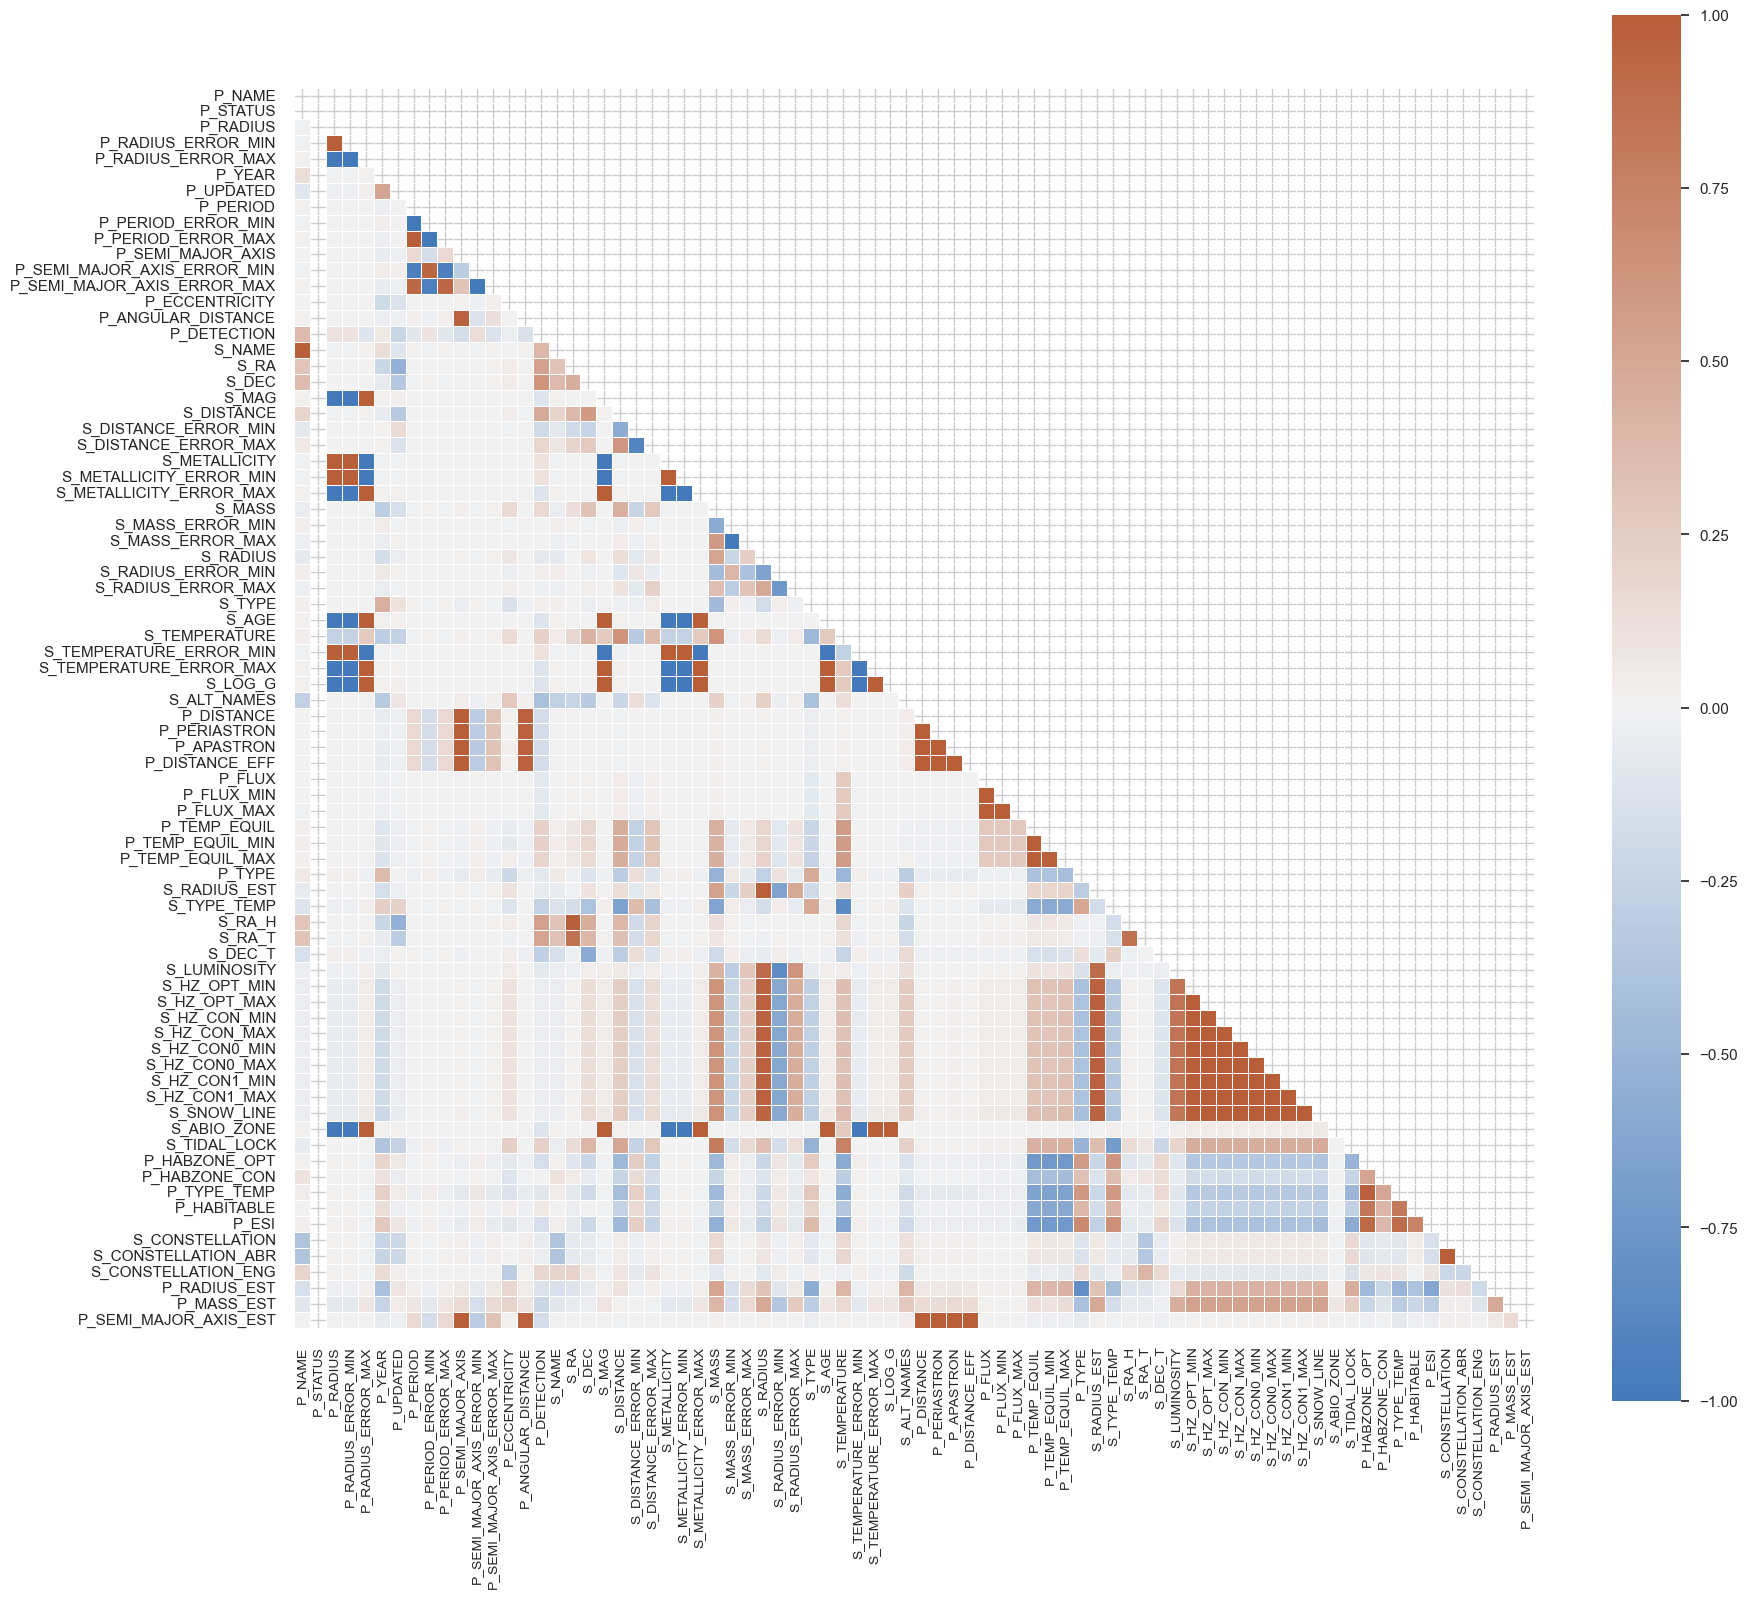

In [243]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = MiceImputed.corr()

# Use bool instead of np.bool
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=False, linewidths=.5, cbar_kws={"shrink": 0.9})


In [244]:
"""We observed dark red squares in the correlation heatmap, indicating perfect correlation among 
pairs of intersecting features. To address this issue, we will discard the correlated features
to enhance the model's robustness."""
#Drop perfectly correlated features
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [245]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11652 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11652 non-null  int32  
 1   P_STATUS                     11652 non-null  float64
 2   P_YEAR                       11652 non-null  int64  
 3   P_UPDATED                    11652 non-null  int32  
 4   P_PERIOD                     11652 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11652 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11652 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11652 non-null  float64
 8   P_ECCENTRICITY               11652 non-null  float64
 9   P_ANGULAR_DISTANCE           11652 non-null  float64
 10  P_DETECTION                  11652 non-null  int32  
 11  S_RA                         11652 non-null  float64
 12  S_DEC                        11652 non-null  float64
 13  S_DISTANCE            

<Axes: >

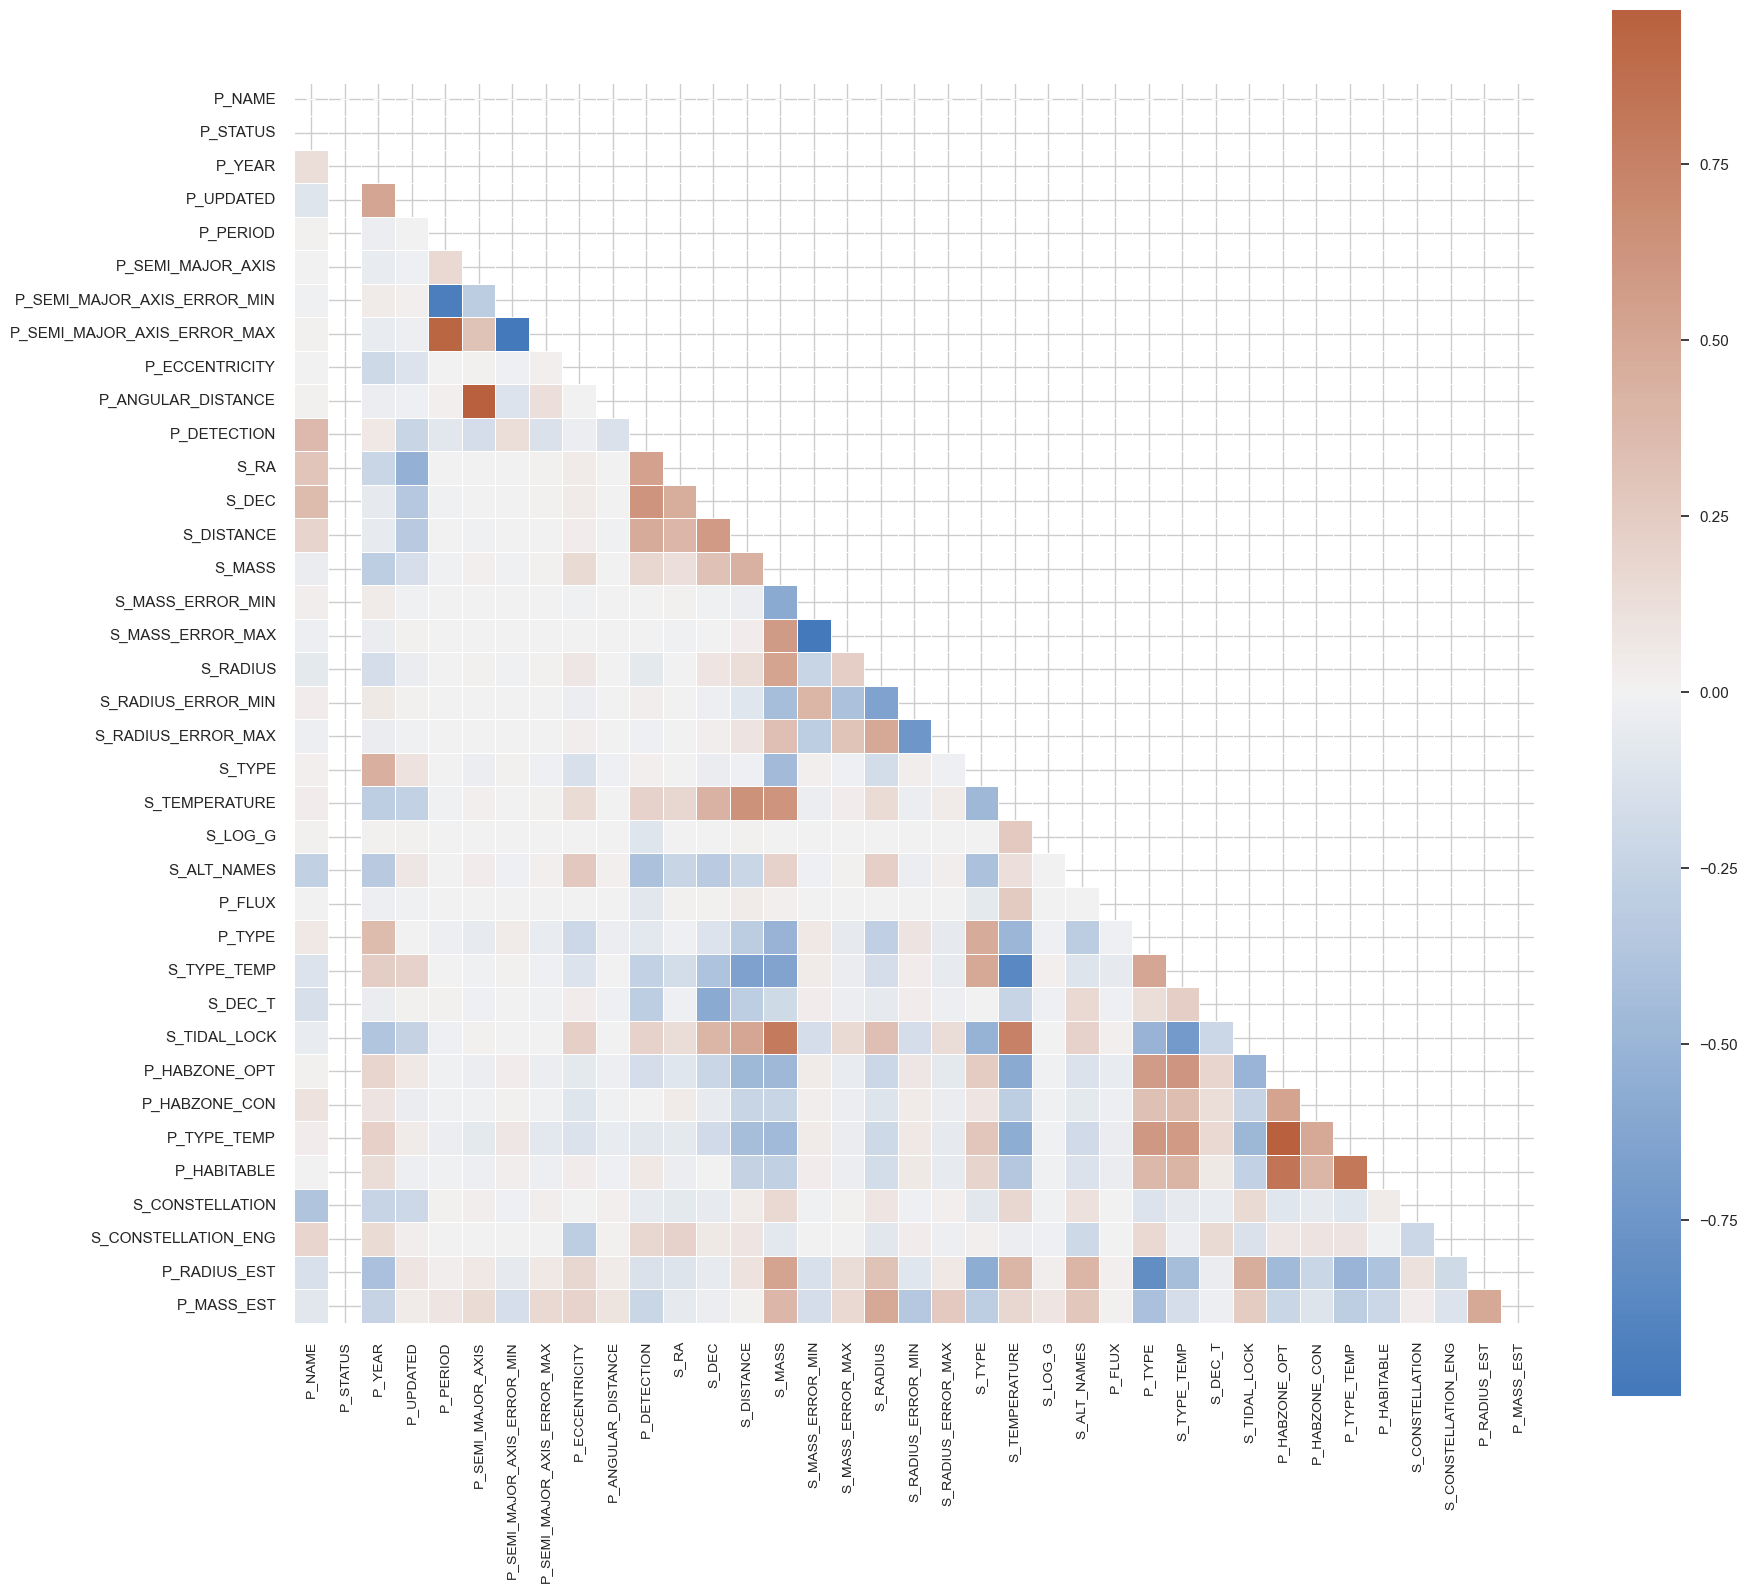

In [246]:
corr = working_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=.5, cbar_kws={"shrink": 0.9})


Some high correlations are spotted but there is no perfect correlation i.e. "1".



### Removal of Outliers :


In [247]:
# Detecting outliers with IQR
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2052.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        86.000000
P_PERIOD                        101.947364
P_SEMI_MAJOR_AXIS                 0.541058
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.030873
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.041100
P_ECCENTRICITY                    0.059435
P_ANGULAR_DISTANCE               31.038976
P_DETECTION                       1.000000
S_RA                            122.413060
S_DEC                            54.138227
S_DISTANCE                      461.900000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.046006
S_MASS_ERROR_MAX                  0.048912
S_RADIUS                          0.520000
S_RADIUS_ERROR_MIN                0.070000
S_RADIUS_ERROR_MAX                0.090000
S_TYPE                            0.000000
S_TEMPERATURE                  2012.000000
S_LOG_G                           2.275737
S_ALT_NAMES

In [248]:
# Removing outliers from dataset
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]
working_data

P_NAME  P_STATUS  P_YEAR  P_UPDATED    P_PERIOD  P_SEMI_MAJOR_AXIS  \
176      139       3.0    2011          0    7.200400           0.050500   
985      879       3.0    2018        122    9.757900           0.077400   
1219    1107       3.0    2016         71   31.637200           0.177900   
1227    1114       3.0    2016         71    9.784300           0.067100   
1233    1120       3.0    2016         71   20.692100           0.135400   
...      ...       ...     ...        ...         ...                ...   
2063    1921       3.0    2016         65  125.413120           0.630058   
3285    3074       3.0    2016         65   56.056054           0.630058   
1473    1341       3.0    2016         65  198.680180           0.630058   
2205    2062       3.0    2017        113  140.252400           0.470600   
2205    2062       3.0    2017        113  140.252400           0.470600   

      P_SEMI_MAJOR_AXIS_ERROR_MIN  P_SEMI_MAJOR_AXIS_ERROR_MAX  \
176                     -0.005300                       0.0044   
985                     -0.002400                       0.0024   
1219                    -0.001600                       0.0016   
1227                    -0.003700                       0.0037   
1233                    -0.004300                       0.0043   
...                           ...                          ...   
2063                    -0.032873                       0.0431   
3285                    -0.032873                       0.0431   
1473                    -0.032873                       0.0431   
2205                    -0.004100                       0.0098   
2205                    -0.004100                       0.0098   

      P_ECCENTRICITY  P_ANGULAR_DISTANCE  ...  S_DEC_T  S_TIDAL_LOCK  \
176         0.130000            7.430000  ...     2609      0.277482   
985         0.120346            0.640000  ...        7      0.399628   
1219        0.120346            0.503000  ...       70      0.419152   
1227        0.120346            0.382000  ...     2431      0.345489   
1233        0.120346            0.431000  ...     2395      0.422845   
...              ...                 ...  ...      ...           ...   
2063        0.122435           32.129004  ...      808      0.377208   
3285        0.122435           32.128975  ...      898      0.363057   
1473        0.122435           32.129013  ...     1285      0.434982   
2205        0.122435            0.623000  ...      818      0.450558   
2205        0.122435            0.623000  ...      818      0.450558   

      P_HABZONE_OPT  P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE  S_CONSTELLATION  \
176               0              0            1            0               72   
985               0              0            1            0               20   
1219              0              0            1            0               45   
1227              0              0            1            0                3   
1233              0              0            1            0                3   
...             ...            ...          ...          ...              ...   
2063              1              1            2            2               51   
3285              1              1            2            2               51   
1473              1              0            2            2               30   
2205              1              1            2            2               30   
2205              1              1            2            2               30   

      S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  
176                    63       2.25747    5.720904  
985                    85       1.63666    3.313943  
1219                   41       1.89449    4.248273  
1227                   83       1.15463    1.627069  
1233                   83       2.41015    6.393219  
...                   ...           ...         ...  
2063                   49       2.48862    6.750619  
3285                   49     

### Feature selection:
In the feature selection process, we will employ permutation importance with Random Forest and a wrapper method using both Random Forest and Extra Trees classifiers. This approach aims to identify the most crucial features that significantly contribute to the determination of exoplanet habitability.






!pip install --upgrade scikit-learn
!pip install --upgrade eli5
!pip install attrs graphviz jinja2 numpy scikit-learn scipy six tabulate
import eli5
print(f"scikit-learn version: {eli5.__version__}")


In [249]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
try:
    import eli5
    print(f"eli5 version: {eli5.__version__}")
except ImportError:
    print("eli5 is not installed.")

eli5 is not installed.


In [251]:
X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
import eli5
from eli5.sklearn import PermutationImportance
X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X, y), random_state=1).fit(X, y)
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X, y), random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names=X.columns.tolist())


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:

print(f"scikit-learn version: {sklearn.__version__}")


In [ ]:
print(f"eli5 version: {eli5.__version__}")

In [252]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\abudh\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [253]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_DEC_T', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.00969544 0.         0.00137074 0.00486019 0.02477138 0.01665164
 0.00736799 0.00889829 0.05545245 0.01635816 0.00032926 0.01599716
 0.04274988 0.16008785 0.0374173  0.00421287 0.00178293 0.00336149
 0.00099135 0.00086499 0.         0.05870478 0.00909275 0.
 0.04023106 0.05755429 0.01961559 0.03270452 0.06202801 0.03830587
 0.00277917 0.03842019 0.00058789 0.00175445 0.12056952 0.10443058]


In [254]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_DEC_T', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.00969544 0.         0.00137074 0.00486019 0.02477138 0.01665164
 0.00736799 0.00889829 0.05545245 0.01635816 0.00032926 0.01599716
 0.04274988 0.16008785 0.0374173  0.00421287 0.00178293 0.00336149
 0.00099135 0.00086499 0.         0.05870478 0.00909275 0.
 0.04023106 0.05755429 0.01961559 0.03270452 0.06202801 0.03830587
 0.00277917 0.03842019 0.00058789 0.00175445 0.12056952 0.10443058]


In [255]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'S_LOG_G', 'P_TYPE', 'S_TYPE_TEMP', 'S_DEC_T', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.03033822 0.         0.006885   0.00237017 0.02171665 0.03606313
 0.01894473 0.02723282 0.04153943 0.00658125 0.02156923 0.0180463
 0.05984202 0.03916466 0.03738643 0.00589808 0.0113534  0.01122575
 0.00827874 0.00950538 0.         0.05881063 0.04241226 0.
 0.02326204 0.10926937 0.04789832 0.01828171 0.03466599 0.05469264
 0.00719494 0.04933219 0.01759368 0.02014284 0.07103085 0.03147113]


 we'll select the features that appear in multiple methods. These chosen features are deemed highly important.

## Train-Test Split :


In [256]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345)

# Normalize Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling with Supervised Learning in Multi-Class Classification
In our approach to the multi-class classification problem, we employ the one-vs-rest strategy across various classifiers. This strategy transforms the multi-class problem into multiple binary classification tasks, and the results are then compared or combined. The classification models utilized in this process include Logistic Regression with Ridge Penalty, Stochastic Gradient Descent with Lasso Penalty, Multinomial Naive Bayes, Passive Aggressive Classifier with Hinge Loss, Perceptron, and Gradient Boosting Classifier.






In [257]:
# Common functions
!pip install plot-confusion-matrix
!pip install confusion-matrix
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, classification_report
from confusion_matrix import plot_confusion_matrix  # Use confusion_matrix module instead
import matplotlib.pyplot as plt

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train, y_train, verbose=0)
    else:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train, y_train)
    y_pred = model_ovr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    print("Accuracy = {}".format(accuracy))
    print("Hamming Loss = {}".format(h_loss))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test, y_pred, digits=5))
    
    # Plot confusion matrix
    disp = plot_confusion_matrix(model_ovr, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    disp.ax_.set_title('Confusion Matrix')
    plt.show()
    
    return accuracy, h_loss, coh_kap, time_taken


Traceback (most recent call last):
  File "C:\Users\abudh\anaconda3\Scripts\pip-script.py", line 9, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\cli\main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\site-packages\pip\_internal\commands\__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abudh\anaconda3\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._boots

### [1] Logistic Regression with Ridge Penalty :



In [258]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'saga', 'multi_class':'multinomial'} #Ridge regularization
model_lr = LogisticRegression(**params_lr)
accuracy_lr, h_loss_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.20190072059631348
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    1.00000   1.00000   1.00000       369
           2    1.00000   1.00000   1.00000       274

    accuracy                        1.00000       687
   macro avg    1.00000   1.00000   1.00000       687
weighted avg    1.00000   1.00000   1.00000       687



InvalidParameterError: The 'y_true' parameter of confusion_matrix must be an array-like. Got OneVsRestClassifier(estimator=LogisticRegression(multi_class='multinomial',
                                                 penalty='l1', solver='saga')) instead.

### [2] Stochastic Gradient Descent with Hinge Loss and Lasso Penalty :



In [ ]:
from sklearn.linear_model import SGDClassifier
# Lasso regularization
params_sgd = {'loss':'hinge', 'penalty':'l2', 'alpha': 1e-3, 'random_state': 12345, 'max_iter': 6, 'tol': None}
model_sgd = SGDClassifier(**params_sgd)
accuracy_sgd, h_loss_sgd, coh_kap_sgd, tt_sgd = run_model(model_sgd, X_train, y_train, X_test, y_test)

### [3] Multinomial Naive Bayes :



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
accuracy_mnb, h_loss_mnb, coh_kap_mnb, tt_mnb = run_model(model_mnb, X_train, y_train, X_test, y_test)

### [4] Passive Aggressive Classifier with Hinge Loss :



In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
params_pac = {'fit_intercept':True, 'random_state': 12345, 'loss':'hinge'}
model_pac = PassiveAggressiveClassifier(**params_pac)
accuracy_pac, h_loss_pac, coh_kap_pac, tt_pac = run_model(model_pac, X_train, y_train, X_test, y_test)

### [5] Simple Perceptron without any Penalty :



In [ ]:
from sklearn.linear_model import Perceptron
params_p = {'penalty':None, 'alpha': 1e-5, 'fit_intercept': True, 'random_state': 12345}
model_p = Perceptron(**params_p)
accuracy_p, h_loss_p, coh_kap_p, tt_p = run_model(model_p, X_train, y_train, X_test, y_test)

### [6] Gradient Boosting Classifier :



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
params_gb = {'loss':'deviance', 'criterion': 'mse', 'n_estimators': 100, 'max_depth': 4, 'random_state': 12345, 'max_features': 'auto'}
model_gb = GradientBoostingClassifier(**params_gb)
accuracy_gb, h_loss_gb, coh_kap_gb, tt_gb = run_model(model_gb, X_train, y_train, X_test, y_test)

## Decision Boundary Plotting for the Models :


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

value = 1.50
width = 0.75

clf1 = LogisticRegression(solver='saga', penalty='l1', random_state=12345)
clf2 = SGDClassifier(random_state=12345)
clf3 = MultinomialNB()
clf4 = PassiveAggressiveClassifier(random_state=12345) 
clf5 = Perceptron(random_state=12345, verbose = 0)
clf6 = GradientBoostingClassifier(n_estimators=1000, random_state=12345, verbose=0)

#Only taking the important planetarial features 
X_list = working_data[["P_TYPE_TEMP", "P_HABZONE_OPT", "P_RADIUS_EST"]] 
X = np.asarray(X_list, dtype=np.float32)
y_list = working_data["P_HABITABLE"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(16,10))

labels = ['Logistic Regression',
          'Stochastic GD',
          'Naive Bayes',
          'Passive Aggressive',
          'Perceptron',
          'Gradient Boosting']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

The decision boundaries depicted by the Passive Aggressive classifier and the Perceptron model exhibit a remarkable similarity. Both models effectively delineate three class regions with minimal misclassification. Additionally, linear models such as Logistic Regression and Stochastic Gradient Descent also demonstrate low misclassification rates.






## Supervised Models Comparison:
In evaluating the performance of supervised models, we consider accuracy score, hinge loss, Cohen's kappa, and execution time. Additionally, insights from decision boundary plotting in the preceding step provide valuable observations.

In [ ]:
model_data = {'Model': ['Logistic Regression','Stochastic GD','Naive Bayes','Passive Aggressive','Perceptron','GB'],
              'Accuracy': accuracy_scores,
              'Hamming_Loss': h_loss_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

accuracy_scores = [accuracy_lr, accuracy_sgd, accuracy_mnb, accuracy_pac, accuracy_p, accuracy_gb]
h_loss_scores = [h_loss_lr, h_loss_sgd, h_loss_mnb, h_loss_pac, h_loss_p, h_loss_gb]
coh_kap_scores = [coh_kap_lr, coh_kap_sgd, coh_kap_mnb, coh_kap_pac, coh_kap_p, coh_kap_gb]
tt = [tt_lr, tt_sgd, tt_mnb, tt_pac, tt_p, tt_gb]

model_data = {'Model': ['Logistic Regression','Stochastic GD','Naive Bayes','Passive Aggressive','Perceptron','GB'],
              'Accuracy': accuracy_scores,
              'Hamming_Loss': h_loss_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

Passive Aggressive classifier, Perceptron, Stochastic GD have the highest accuracy and lowest execution time.



In [ ]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Hamming Loss and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('Hamming_Loss', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='Hamming_Loss', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()


Passive Aggressive Classifier emerges as the top-performing model for exoplanet habitability classification, boasting a zero hinge loss and the highest Cohen's Kappa score. This solidifies its position as the most effective choice for the given dataset.






## Experimenting with Unsupervised Learning :


The process involves initially removing habitability labels from the dataset. Subsequently, we will employ the K-Means clustering model to assess if it produces three distinct clusters within the data.






In [ ]:
working_data_unsup = working_data.drop(['P_HABITABLE'], axis=1)


In [ ]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(working_data_unsup)    
visualizer.poof()

After confirming the ideal number of clusters as 3, the next step involves fitting the data into the K-Means model to obtain the cluster centers.






In [ ]:
#Fitting data into K-Means model with 3 clusters
km_3 = KMeans(n_clusters=3,random_state=12345)
km_3.fit(working_data_unsup)
print(km_3.cluster_centers_)

The classification results indicate the presence of 1818 unhabitable, 786 conservatively habitable, and 775 optimistically habitable exoplanets.






In [ ]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(working_data_unsup, km_3.labels_)

In [ ]:
cluster_labels = km_3.fit_predict(working_data)


In [ ]:
# Prediction
preds = km_3.labels_
data_df = pd.DataFrame(working_data_unsup)
data_df['KM_Clusters'] = preds
data_df.head(10)

In [ ]:
#Visualize clusters: Feature Pair-1
import seaborn as sns
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,8))
#Planet Flux vs Star Tidal Lock Region 
g =sns.scatterplot(x=working_data_unsup.iloc[:,24], y=working_data_unsup.iloc[:,28],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], edgecolor='white', size='P_ECCENTRICITY', sizes=(50,200));
g.set(xscale="log");
g.grid(False)
plt.title("Planet Flux vs Star Tidal Lock Region sized by Eccentricity (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Planet Flux", fontsize=12)
plt.ylabel("Star Tidal Lock Region", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [ ]:
#Visualize clusters: Feature Pair-2
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize=(12,6))
#Estimated Planet Radius vs Star Declination 
g =sns.scatterplot(x=working_data_unsup.iloc[:,35], y=working_data_unsup.iloc[:,12],
              hue=cluster_labels,
              data=working_data_unsup, 
              palette=['green','orange','red'], size='P_PERIOD', sizes=(100,300));
g.set(xscale="log");
g.grid(False)
plt.title("Estimated Planet Radius vs Star Declination sized by Period (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Estimated Planet Radius", fontsize=12)
plt.ylabel("Star Declination", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

The clear and distinguishable clusters observed in both images confirm the credibility of the labels assigned by the K-Means algorithm.






In [ ]:
#Export KMeans results to file
data_df.to_csv("KMeans_results.csv", index = False)
print("Submission successful")